In [2]:
#全局变量
from dateutil.parser import parse
import numpy as np
import random
import pandas as pd
filep='D:\\python-document\\rerun_review_visit\\'
pathdid='D:\\python-document\\rerun_review_visit\\did\\'
import os
if not os.path.exists(pathdid):
    os.makedirs(pathdid)
if not os.path.exists(filep):
    os.makedirs(filep)
#经常用的函数

def trans_time(f):
    f1=f.apply(lambda x:parse(x))
    f1=f1.apply(lambda x:str(x.year)+'-'+'{:02}'.format(x.month))
    return f1
def to_time(f):
    f1=f.apply(lambda x:parse(x))
    return f1
def to_str(f):
    f1=f.apply(lambda x:str(x.year)+'-'+'{:02}'.format(x.month))
    return f1
import re
def month_differ(x, y):
    """暂不考虑day, 只根据month和year计算相差月份
    Parameters
    ----------
    x, y: 两个datetime.datetime类型的变量
 
    Return
    ------
    differ: x, y相差的月份
    """
    xyear=np.array([i.year for i in x])
    yyear=np.array([i.year for i in y])
    xmonth=np.array([i.month for i in x])
    ymonth=np.array([i.month for i in y])
    month_differ = (xyear - yyear) * 12 + (xmonth - ymonth) * 1
    return month_differ


# 数据合并

## 数据库导出（评论数据）

In [5]:
#将sql中的数据导入到dataframe中
import pandas as pd
from sqlalchemy import create_engine
db_info = {'user': 'root',
            'password': '267708',
            'host': 'localhost',
           'port': 3306,
            'database': 'spider'
           }

engine = create_engine('mysql+pymysql://%(user)s:%(password)s@%(host)s:%(port)d/%(database)s?charset=utf8' % db_info, encoding='utf-8')
df = pd.read_sql_table('ta_commentfinal', engine)
#df.to_csv("d://python-document//tripadviser.csv")
#df.info()
df.isnull().sum()
#填充空值
nacolumn_zero=['user_name','user_votes','comment_thanks','comment_topic','user_review_counts',
               'user_attrction_review_counts','picture_count','visited_time']
nacolumn_one=['user_level']
for i in nacolumn_zero:
    df[i]=df[i].fillna(0)
for i in nacolumn_one:
    df[i]=df[i].fillna(1)
df.info()
'''
for i in df.columns:
    df[i]=df[i].fillna(0)
df.info()
'''
#将user_level换成整数
print(df.user_level.value_counts())
df.user_level=df.user_level.apply(lambda x: int(float(x)))
df.user_level[:10]
print(df.user_level.value_counts())
#将location空格去掉
df.user_location=df.user_location.apply(lambda x:x.strip())#只能运行一遍
df.head()
print(sum(df.duplicated()))#是否有重复值
df['review_time']=df['review_time'].apply(lambda x:x.strip())#去除不必要的空格
#处理visited_time
import re
df['visited_time']=df['visited_time'].apply(lambda x:str(x).strip())#去除不必要的空格
df['visited_time']=df['visited_time'].apply(lambda x:re.search('Visited (.*)',x)[1] if x!='0' else '0')
#df['visited_time'][:4]   
df.to_csv("%s1.1com_origin.csv"%filep,index=False)

F:\Adaconda3\lib\site-packages\pymysql\cursors.py:170: Warning: (1366, "Incorrect string value: '\\xD6\\xD0\\xB9\\xFA\\xB1\\xEA...' for column 'VARIABLE_VALUE' at row 496")
  result = self._query(query)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182097 entries, 0 to 182096
Data columns (total 15 columns):
attraction_id                   182097 non-null object
comment_id                      182097 non-null object
user_name                       182097 non-null object
user_location                   182097 non-null object
user_level                      182097 non-null object
user_review_counts              182097 non-null object
user_attrction_review_counts    182097 non-null object
user_votes                      182097 non-null object
review_time                     182097 non-null object
score                           182097 non-null object
comment_topic                   182097 non-null object
comment_content                 182097 non-null object
comment_thanks                  182097 non-null object
visited_time                    182097 non-null object
picture_count                   182097 non-null object
dtypes: object(15)
memory usage: 20.8+ MB
06    53398
05    3059

In [6]:
#处理时间，review_time不变
'''
df=pd.read_csv("%s1.1com_origin.csv"%filep)
df['review_time']=trans_time(df['review_time'])
#df['review_time_origin']=df['review_time']
#df['visited_time'][df.visited_time=='0']=df['review_time'][df.visited_time=='0']#将顺序反过来就没有变
#df['visited_time']=trans_time(df['visited_time'])
#df['review_time']=df['visited_time']

#处理review_time
#df['visit_review']=month_differ(to_time(df['review_time_origin']),to_time(df['visited_time']))
#print((df['visit_review']>=0).sum())#171631rows
#df['review_time'][df['visit_review']>=0]=df['visited_time'][df['visit_review']>=0]
#print((df['review_time']<df['visited_time']).sum())#10466这是时间出错的评论数
'''

In [ ]:
#处理时间,根据visit_time填充
df=pd.read_csv("%s1.1com_origin.csv"%filep)
df['review_time']=trans_time(df['review_time'])
df['review_time_origin']=df['review_time']
df['visited_time'][df.visited_time=='0']=df['review_time'][df.visited_time=='0']#将顺序反过来就没有变
df['visited_time']=trans_time(df['visited_time'])
#df['review_time']=df['visited_time']

#处理review_time
df['visit_review']=month_differ(to_time(df['review_time_origin']),to_time(df['visited_time']))
print((df['visit_review']>=0).sum())#171631rows
df['review_time'][df['visit_review']>=0]=df['visited_time'][df['visit_review']>=0]
print((df['review_time']<df['visited_time']).sum())#10466这是时间出错的评论数


In [7]:
df['comment_content_count']=df['comment_content'].apply(lambda x:len([i for i in x.strip().split(' ')]))
df['comment_counts']=1
df_groupby=df.groupby(['attraction_id',"review_time"])['user_level', 'user_review_counts', 'user_attrction_review_counts',
'user_votes', 'score','comment_thanks','comment_content_count','picture_count'].mean().reset_index()
comment_count=df.groupby(['attraction_id',"review_time"])['comment_counts'].sum().reset_index()
#comment_count=data.groupby(['attraction_id',"review_time"]).agg('comment_content_count',count)
df_groupby=pd.merge(df_groupby,comment_count,on=['attraction_id',"review_time"],how='left')
#取小数
df_groupby['attraction_id']=df_groupby['attraction_id'].apply(lambda x:str(x))
for i in df_groupby.columns[2:]:
    df_groupby[i]= df_groupby[i].apply(lambda x:round(x,2))
df_groupby.to_csv("%s1.1com_bymonth.csv"%filep,index=False)

In [8]:
df_groupby.duplicated().sum()

0

## 整合景点数据

In [9]:
#景点主页数据
attraction=pd.read_excel(u'F:\\研究生毕设数据\\divvybike data\\data.xlsx',sheet_name='all')
attraction.dropna(subset=['latitude'],inplace=True)#去掉坐标为空的景点
attraction.to_csv("%s1.2attraction.csv"%filep,index=False)

#将评论数据与景点的位置联系起来
attaction=pd.read_csv("%s1.2attraction.csv"%filep)
attaction.shape
tripadviser=pd.read_csv("%s1.1com_bymonth.csv"%filep)
trip_attraction=pd.merge(tripadviser,attaction,left_on='attraction_id',right_on='id',how='left')
#trip_attraction.dropna(subset=['latitude'],inplace=True)#去掉坐标为空的景点
#去除坐标值为空的数据
trip_attraction.dropna(subset=['latitude'],inplace=True)#去掉坐标为空的景点
trip_attraction.info()
trip_attraction.to_csv("%s1.2comment_attraction.csv"%filep,index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20093 entries, 0 to 20350
Data columns (total 25 columns):
attraction_id                   20093 non-null int64
review_time                     20093 non-null object
user_level                      20093 non-null float64
user_review_counts              20093 non-null float64
user_attrction_review_counts    20093 non-null float64
user_votes                      20093 non-null float64
score                           20093 non-null float64
comment_thanks                  20093 non-null float64
comment_content_count           20093 non-null float64
picture_count                   20093 non-null float64
comment_counts                  20093 non-null int64
id                              20093 non-null float64
name                            20093 non-null object
walk score                      20093 non-null float64
transit score                   20093 non-null float64
bike score                      20093 non-null float64
types            

## 整合站点数据（按距离）

### 站点数据

In [2]:
import pandas as pd
station=pd.read_csv(u'F:\\研究生毕设数据\\divvybike data\\Divvy_Trips_2017_Q3Q4\\Divvy_Stations_2017_Q3Q4.csv',
                    encoding='utf-8',engine='python')
#station.drop(station.columns[-1],axis=1,inplace=True)#去掉最后的空列
station['online_date1']=trans_time(station['online_date'])
station.to_csv("%s1.3.1station.csv"%filep,index=False)
station['online_date1'].value_counts().sort_index()#主要集中于2013,2015,2016
station['online_date1'].value_counts().sort_index().to_csv('d:\\station.csv')

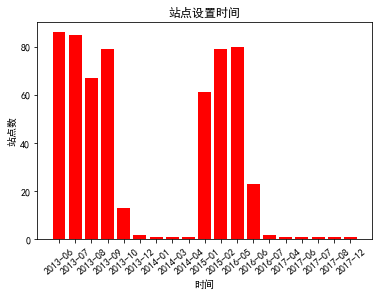

In [3]:
%matplotlib inline
import pandas as pd
station=pd.read_csv(u'F:\\研究生毕设数据\\divvybike data\\Divvy_Trips_2017_Q3Q4\\Divvy_Stations_2017_Q3Q4.csv',
                    encoding='utf-8',engine='python')
#station.drop(station.columns[-1],axis=1,inplace=True)#去掉最后的空列
station['online_date1']=trans_time(station['online_date'])
station.to_csv("%s1.3.1station.csv"%filep,index=False)
station['online_date1'].value_counts().sort_index()#主要集中于2013,2015,2016

import matplotlib.pyplot as plt
a=station['online_date1'].value_counts().sort_index()
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
fig= plt.figure()
xlabels=a.index.values
ax = fig.add_subplot(111)
plt.title("站点设置时间") 
plt.xlabel("时间") 
plt.ylabel("站点数") 
fig1=plt.bar(a.index,a.values,color='r')
ax.set_xticklabels(xlabels,rotation=40)
d='C:\\Users\\tcnick\\Desktop\\站点数统计'
plt.savefig("{}.jpg".format(d), dpi=500)#先show
plt.show()

In [25]:
help(plt.xticks)

Help on function xticks in module matplotlib.pyplot:

xticks(*args, **kwargs)
    Get or set the *x*-limits of the current tick locations and labels.
    
    ::
    
      # return locs, labels where locs is an array of tick locations and
      # labels is an array of tick labels.
      locs, labels = xticks()
    
      # set the locations of the xticks
      xticks( arange(6) )
    
      # set the locations and labels of the xticks
      xticks( arange(5), ('Tom', 'Dick', 'Harry', 'Sally', 'Sue') )
    
    The keyword args, if any, are :class:`~matplotlib.text.Text`
    properties. For example, to rotate long labels::
    
      xticks( arange(12), calendar.month_name[1:13], rotation=17 )



In [21]:
a=station['online_date1'].value_counts().sort_index()
a.index

Index(['2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-12',
       '2014-01', '2014-03', '2014-04', '2015-01', '2015-02', '2016-05',
       '2016-06', '2016-07', '2017-04', '2017-06', '2017-07', '2017-08',
       '2017-12'],
      dtype='object')

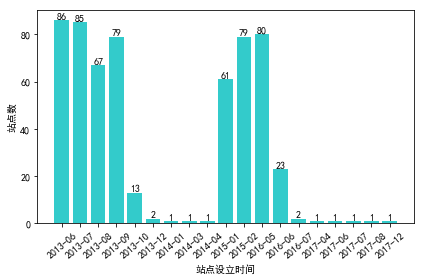

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
fig= plt.figure()
#设置x轴柱子的个数
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
a=station['online_date1'].value_counts().sort_index()
x=np.arange(len(a.index))
#设置y轴的数值，需将numbers列的数据先转化为数列，再转化为矩阵格式
y=a.values
xticks1=list(a.index) #构造不同课程类目的数列
#画出柱状图
plt.bar(x,y,align='center',color = 'c',alpha=0.8)
#设置x轴的刻度，将构建的xticks代入，同时由于课程类目文字较多，在一块会比较拥挤和重叠，因此设置字体和对齐方式
plt.xticks(x,xticks1,rotation=40)
#x、y轴标签与图形标题
plt.xlabel('站点设立时间')
plt.ylabel('站点数')
#plt.title('不同课程类别的平均学习人数')
#设置数字标签**
for i,j in zip(x,y):
    plt.text(i, j+0.1, '%.0f' % j, ha='center', va= 'bottom',fontsize=10)
#设置y轴的范围
#plt.ylim(0,3700)
d='C:\\Users\\tcnick\\Desktop\\站点数统计2'
plt.tight_layout()#在保存的时候可以显示完全
plt.savefig("{}.jpg".format(d), dpi=500)#先show
plt.show()

In [20]:
list(to_str(a.time))

['2013-06',
 '2013-07',
 '2013-08',
 '2013-09',
 '2013-10',
 '2013-11',
 '2013-12',
 '2014-01',
 '2014-02',
 '2014-03',
 '2014-04',
 '2014-05',
 '2014-06',
 '2014-07',
 '2014-08',
 '2014-09',
 '2014-10',
 '2014-11',
 '2014-12',
 '2015-01',
 '2015-02',
 '2015-03',
 '2015-04',
 '2015-05',
 '2015-06',
 '2015-07',
 '2015-08',
 '2015-09',
 '2015-10',
 '2015-11',
 '2015-12',
 '2016-01',
 '2016-02',
 '2016-03',
 '2016-04',
 '2016-05',
 '2016-06',
 '2016-07',
 '2016-08',
 '2016-09',
 '2016-10',
 '2016-11',
 '2016-12',
 '2017-01',
 '2017-02',
 '2017-03',
 '2017-04',
 '2017-05',
 '2017-06',
 '2017-07',
 '2017-08',
 '2017-09',
 '2017-10',
 '2017-11',
 '2017-12']

In [25]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54])

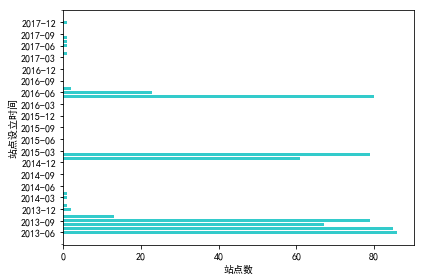

In [10]:
#将中间站点数为0的补充完整
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
fig= plt.figure()
ax = fig.add_subplot(111)
#设置x轴柱子的个数
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
a=pd.read_excel('d:\\station.xlsx',sheet_name='Sheet1')
x=np.arange(len(a.time))

#设置y轴的数值，需将numbers列的数据先转化为数列，再转化为矩阵格式
y=a.jishu
xticks1=list(to_str(a.time)) #构造不同课程类目的数列
#画出柱状图
plt.barh(x,y,align='center',color = 'c',alpha=0.8)
#设置主刻度与副刻度
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
xmajorLocator   = MultipleLocator(3) #将x主刻度标签设置为20的倍数
xmajorFormatter = FormatStrFormatter('%5.1f') #设置x轴标签文本的格式
xminorLocator   = MultipleLocator(3) #将x轴次刻度标签设置为5的倍数




#设置x轴的刻度，将构建的xticks代入，同时由于课程类目文字较多，在一块会比较拥挤和重叠，因此设置字体和对齐方式
ax.yaxis.set_major_locator(xmajorLocator)
ax.yaxis.set_major_formatter(xmajorFormatter)
ax.yaxis.set_minor_locator(xminorLocator)

tick_spacing=3
plt.yticks(x[::3],xticks1[::3])


#x、y轴标签与图形标题
plt.ylabel('站点设立时间')
plt.xlabel('站点数')
#plt.title('不同课程类别的平均学习人数')
#设置数字标签**
#for i,j in zip(x,y):
#    plt.text(i, j+0.1, '%.0f' % j, ha='center', va= 'bottom',fontsize=10)
#设置y轴的范围
#plt.ylim(0,3700)
d='C:\\Users\\tcnick\\Desktop\\站点数统计2'

plt.tight_layout()#在保存的时候可以显示完全

'''
tick_spacing=3
#ax.set_xticklabels(xlabels,rotation=40)#为什么加了这个就不行了
cc=list(ax.get_yticklabels())
for label in cc:
    label.set_visible(False)
    #ax.tick_params(direction='out',width=0.5,length=10,color='g')
for label1 in cc[::tick_spacing]:
    label1.set_visible(True)

'''
#ax.yaxis.set_major_locator(cc[::tick_spacing])


#ax.invert_xaxis()
plt.savefig("{}.jpg".format(d), dpi=500)#先show
plt.show()

In [10]:
help(ax.xaxis.set_major_locator)

Help on method set_major_locator in module matplotlib.axis:

set_major_locator(locator) method of matplotlib.axis.XAxis instance
    Set the locator of the major ticker
    
    ACCEPTS: a :class:`~matplotlib.ticker.Locator` instance



In [53]:
help(plt.bar)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

Help on function bar in module matplotlib.pyplot:

bar(*args, **kwargs)
    Make a bar plot.
    
    Call signatures::
    
       bar(x, height, *, align='center', **kwargs)
       bar(x, height, width, *, align='center', **kwargs)
       bar(x, height, width, bottom, *, align='center', **kwargs)
    
    Make a bar plot with rectangles bounded by
    
    .. math::
    
       (x - width/2, x + width/2, bottom, bottom + height)
    
    (left, right, bottom and top edges) by default.  *x*,
    *height*, *width*, and *bottom* can be either scalars or
    sequences.
    
    The *align* and *orientation* kwargs control the interpretation of *x*
    and *bottom*
    
    The *align* keyword-only argument controls if *x* is interpreted
    as the center or the left edge of the rectangle.
    
    Parameters
    ----------
    x : sequence of scalars
        the x coordinates of the bars.
    
        *align* controls if *x* is the bar center (default) or
        left edge.
    
    heig

In [50]:
list(ax.get_xticklabels())

[Text(0,0,'2013-06'),
 Text(1,0,'2013-07'),
 Text(2,0,'2013-08'),
 Text(3,0,'2013-09'),
 Text(4,0,'2013-10'),
 Text(5,0,'2013-12'),
 Text(6,0,'2014-01'),
 Text(7,0,'2014-03'),
 Text(8,0,'2014-04'),
 Text(9,0,'2015-01'),
 Text(10,0,'2015-02'),
 Text(11,0,'2016-05'),
 Text(12,0,'2016-06'),
 Text(13,0,'2016-07'),
 Text(14,0,'2017-04'),
 Text(15,0,'2017-06'),
 Text(16,0,'2017-07'),
 Text(17,0,'2017-08'),
 Text(18,0,'2017-12'),
 Text(19,0,''),
 Text(20,0,''),
 Text(21,0,''),
 Text(22,0,''),
 Text(23,0,''),
 Text(24,0,''),
 Text(25,0,''),
 Text(26,0,''),
 Text(27,0,''),
 Text(28,0,''),
 Text(29,0,''),
 Text(30,0,''),
 Text(31,0,''),
 Text(32,0,''),
 Text(33,0,''),
 Text(34,0,''),
 Text(35,0,''),
 Text(36,0,''),
 Text(37,0,''),
 Text(38,0,''),
 Text(39,0,''),
 Text(40,0,''),
 Text(41,0,''),
 Text(42,0,''),
 Text(43,0,''),
 Text(44,0,''),
 Text(45,0,''),
 Text(46,0,''),
 Text(47,0,''),
 Text(48,0,''),
 Text(49,0,''),
 Text(50,0,''),
 Text(51,0,''),
 Text(52,0,''),
 Text(53,0,''),
 Text(54,0,''

### 最短距离

In [15]:
#然后计算与station在对应时间的最近位置
import pandas as pd
from geopy.distance import geodesic#可以简便计算位置的包，包含很多与地理数据处理有关的方法
trip_attraction=pd.read_csv("%s1.2comment_attraction.csv"%filep)
station=pd.read_csv("%s1.3.1station.csv"%filep)

#最短距离及对应站点
final=[]
for i in trip_attraction.index: 
#    print(trip_attraction.loc[i].values[2])
    stationslice=station[station['online_date1']<=trip_attraction['review_time'][i]]
    distance={}
    a=trip_attraction.loc[i].values[-2]
    b=trip_attraction.loc[i].values[-1]
    for x,y,z in zip(stationslice['latitude'].values,stationslice['longitude'].values,stationslice['id'].values):
        dis=geodesic((a,b), (x,y)).m
        distance[z]=dis
    if len(distance)==0:
        final.append(('null','null'))
    else:
        final.append(min(distance.items(), key=lambda x: x[1]))
print(len(final))
#然后将最短距离字典进行整合
final1=pd.DataFrame(final,columns=['recent_station','shortest_dis'])
trip_attraction1=pd.concat([trip_attraction,final1],axis=1)
trip_attraction1['shortest_dis']=trip_attraction1['shortest_dis'].apply(lambda x:0 if x=='null' else x)
trip_attraction1['recent_station']=trip_attraction1['recent_station'].apply(lambda x:0 if x=='null' else x)
#trip_attraction1['shortest_dis']=trip_attraction1['shortest_dis'].fillna(100000).apply(lambda x:round(float(x),0))
trip_attraction1.to_csv("%s1.3.2shortest_dis.csv"%filep,index=0)
print(trip_attraction1.shape)#(20391, 27)
print(sum(trip_attraction1['shortest_dis'].values>=800))#585   600
print(sum(trip_attraction1['shortest_dis'].values>=600))#729  749

KeyboardInterrupt: 

### 距离中间结果

In [12]:
#做200m，300m等
from geopy.distance import geodesic#可以简便计算位置的包，包含很多与地理数据处理有关的方法
trip_attraction=pd.read_csv("%s1.3.2shortest_dis.csv"%filep)
station=pd.read_csv("%s1.3.1station.csv"%filep)

#计算中间结果
final=[]
for i in trip_attraction.index: 
    stationslice=station[station['online_date1']<=trip_attraction.loc[i]['review_time']]
    a=trip_attraction.loc[i]['latitude']
    b=trip_attraction.loc[i]['longitude']
    if not stationslice.empty:
        jieguozj=[]
        for x,y,z,d in zip(stationslice['latitude'].values,stationslice['longitude'].values,stationslice['id'].values,
                   stationslice['online_date1'] ):
            dis=geodesic((a,b), (x,y)).m
            jieguozj.append([trip_attraction['attraction_id'][i],trip_attraction['review_time'][i],z,d,dis])
        final.append(jieguozj)
print(len(final))
#保存中间结果并分析，将其整理到原来的表中
#保存中间结果，做好备份
for item in final:
    with open("%s1.3.3distance_of_station_attraction.txt"%filep,'a') as f:
        f.write(str(item)+'\n')

15991


### 具体距离（200m等）

In [2]:
#读取结果并分析
import pandas as pd
def read_mjieguo(f):
    with open(f,'r') as f:
        for i in f:
            yield i
f="%s1.3.3distance_of_station_attraction.txt"%filep
def calcD(d=0):
    huizong=[]
    for i in read_mjieguo(f):
        ad=pd.DataFrame(eval(i),columns=['attraction_id','review_time','station_id','station_onlinetime','distance'])
        ad['distance']=ad['distance'].apply(lambda x:int(round(float(x),0)))
        ads=ad[ad.distance<=d]
        if not ads.empty:
            alist=[list(ads.attraction_id)[0],list(ads.review_time)[0],list(ads['station_id']),
                   list(ads['station_onlinetime']),list(ads['distance'])]#不一定能被赋值
            #赋值之后变成了局部变量，搞不懂
            huizong.append(alist)
    huizong1=pd.DataFrame(huizong,
                          columns=['attraction_id','review_time','station_id','station_onlinetime','distance']) 
    huizong1.to_csv("%s1.3.4_"%filep+str(d)+"m.csv",index=False)
#calcD(d=200)
#calcD(d=300)
calcD(d=100)

In [3]:
#一并整合进去，汇总数据
import pandas as pd
def station_d(d):
    tripad_attraction_station=pd.read_csv("%s1.3.2shortest_dis.csv"%filep)
    t_slice=tripad_attraction_station[['attraction_id','review_time']]
    datax=pd.read_csv("%s1.3.4_"%filep+d+"m.csv")
    datax['station_time_'+d]=datax.station_onlinetime.apply(lambda x:min(eval(x)))
    datax['has_station_'+d]=datax['station_time_'+d].apply(lambda x:1 if x!='0' else 0) 
    datax['station_count_'+d]=datax.station_id.apply(lambda x:len(eval(x)))
    data_merge=pd.merge(t_slice,datax,on=['attraction_id','review_time'],how='left')
    data_merge.drop(['station_id','station_onlinetime','distance'],axis=1,inplace=True)
    data_merge[['station_time_'+d,'has_station_'+d,'station_count_'+d]]=data_merge[['station_time_'+d,'has_station_'+d,'station_count_'+d]].fillna(0)
    data_merge1=pd.merge(tripad_attraction_station,data_merge,on=['attraction_id','review_time'],how='left')
    data_merge1=data_merge1.drop_duplicates(['attraction_id','review_time'])
    data_merge1.to_csv("%s1.3.4_..+station"%filep+d+'m.csv',index=0)
    return data_merge1
#station_d('200')
#station_d('300')
station_d('100')

,Unnamed: 0,attraction_id,review_time,user_level,user_review_counts,user_attrction_review_counts,user_votes,score,comment_thanks,comment_content_count,...,group,address,near,latitude,longitude,recent_station,shortest_dis,station_time_100,has_station_100,station_count_100
0,0,103238,2002-02,1.00,0.00,0.00,0.00,4.00,18.00,80.00,...,705.0,"233 S. Wacker Drive,Entrance on Jackson Blvd,C...",Downtown / The Loop,41.878700,-87.635980,0,0.000000,0,0.0,0.0
1,1,103238,2004-01,1.00,1.00,0.00,8.00,5.00,8.00,21.00,...,705.0,"233 S. Wacker Drive,Entrance on Jackson Blvd,C...",Downtown / The Loop,41.878700,-87.635980,0,0.000000,0,0.0,0.0
2,2,103238,2004-03,1.00,1.00,0.00,5.00,3.00,5.00,47.00,...,705.0,"233 S. Wacker Drive,Entrance on Jackson Blvd,C...",Downtown / The Loop,41.878700,-87.635980,0,0.000000,0,0.0,0.0
3,3,103238,2004-04,1.00,1.00,0.00,9.00,5.00,9.00,67.00,...,705.0,"233 S. Wacker Drive,Entrance on Jackson Blvd,C...",Downtown / The Loop,41.878700,-87.635980,0,0.000000,0,0.0,0.0
4,4,103238,2004-09,2.00,9.00,5.00,37.00,5.00,14.00,40.00,...,705.0,"233 S. Wacker Drive,Entrance on Jackson Blvd,C...",Downtown / The Loop,41.878700,-87.635980,0,0.000000,0,0.0,0.0
5,5,103238,2004-10,1.00,1.00,0.00,17.00,5.00,17.00,71.00,...,705.0,"233 S. Wacker Drive,Entrance on Jackson Blvd,C...",Downtown / The Loop,41.878700,-87.635980,0,0.000000,0,0.0,0.0
6,6,103238,2004-12,4.00,24.00,9.50,272.50,3.50,22.50,141.00,...,705.0,"233 S. Wacker Drive,Entrance on Jackson Blvd,C...",Downtown / The Loop,41.878700,-87.635980,0,0.000000,0,0.0,0.0
7,7,103238,2005-09,6.00,185.00,35.00,300.00,4.00,12.00,124.00,...,705.0,"233 S. Wacker Drive,Entrance on Jackson Blvd,C...",Downtown / The Loop,41.878700,-87.635980,0,0.000000,0,0.0,0.0
8,8,103238,2006-01,5.00,52.00,10.00,71.00,1.00,35.00,387.00,...,705.0,"233 S. Wacker Drive,Entrance on Jackson Blvd,C...",Downtown / The Loop,41.878700,-87.635980,0,0.000000,0,0.0,0.0
9,9,103238,2006-05,4.00,31.00,8.00,103.00,4.00,10.00,84.00,...,705.0,"233 S. Wacker Drive,Entrance on Jackson Blvd,C...",Downtown / The Loop,41.878700,-87.635980,0,0.000000,0,0.0,0.0


## 整合divvy_trips数据（按距离）

In [4]:
import pandas as pd
#读取文件名
import os
f='D:\\python-document\\divvy_trips\\xx\\'
def trips_origin(f):
    filelist=os.listdir(f)
    col=['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
         'from_station_id', 'from_station_name', 'to_station_id',
         'to_station_name', 'usertype', 'gender', 'birthyear','trip_time','is_sub',
         'is_male','is_female','age']
    huizongz=pd.DataFrame(columns=col)
    for item in filelist:
        medi=pd.read_csv(f+item)
        medi.columns=['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear']
        medi['trip_time']=medi['stoptime']
        medi['trip_time']=to_time(medi['trip_time'])
        try:
            medi['tripduration']=medi['tripduration'].apply(lambda x: int(float(x.replace(',',''))))#这个是有字符串，的版本
        except:
            medi['tripduration']=medi['tripduration']
        medi['is_sub']=medi['usertype'].apply(lambda x:1 if x=='Subscriber' else 0)
        medi['is_male']=medi['gender'].apply(lambda x:1 if x=='Male' else 0)
        medi['is_female']=medi['gender'].apply(lambda x:1 if x=='Female' else 0)
        medi['age']=medi['trip_time'].apply(lambda x:x.year)-medi['birthyear']
        huizongz=pd.concat([huizongz,medi],axis=0)
        print(item,':完成')

#将非订阅用户的用户数据去掉，数据太少，不利于之后的分析
    huizongz['is_male'][huizongz.is_sub==0]=0
    huizongz['is_female'][huizongz.is_sub==0]=0
    huizongz['age'][huizongz.age>90.0]=90.0
    huizongz['age'][huizongz.age<10.0]=10.0
    huizongz['age'][huizongz.is_sub==0]=0


    huizongz['tripduration'][huizongz.tripduration>12*3600]=12*3600
    huizongz['is_male'][(huizongz.is_sub==1) & (huizongz.gender.isnull())]=huizongz['is_male'][(huizongz.is_sub==1) & (huizongz.gender.isnull())]\
    .apply(lambda x:random.choices([1,0], weights=[0.75,0.25],k=1)[0])
    huizongz['is_female'][(huizongz.is_sub==1) & (huizongz.gender.isnull())]=1-huizongz['is_male']\
    [(huizongz.is_sub==1) & (huizongz.gender.isnull())].values
    print('finish')
    huizongz['trip_time']=to_str(huizongz['trip_time'])    
    huizongz.to_csv("%s1.4.0trips_origin.csv"%filep,index=0)
    return huizongz
#huizongz=trips_origin(f)
'''
#没有区分入站和出站点
import pandas as pd
#读取文件名
import os
filelist=os.listdir('D:\\python-document\\divvy_trips\\xx\\')
a='D:\\python-document\\divvy_trips\\xx\\'
aad=pd.read_csv('D:\\python-document\\tripad_attraction_station_(400,600,800).csv')
dataq=aad[['attraction_id','review_time','recent_station']]
huizongz=pd.DataFrame(columns=['attraction_id', 'review_time','is_sub', 'count_id','tripduration'])
for item in filelist:
    medi=pd.read_csv(a+item)
    medi.columns=['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthday']
    medi['trip_time']=medi['stoptime']
    medi['trip_time']=trans_time(medi['trip_time'])
    medi['count_id']=1
    medi['is_sub']=medi['usertype'].apply(lambda x:1 if x=='Subscriber' else 0)
    medi_group=medi.groupby(['trip_time','to_station_id'])['is_sub','count_id','tripduration'].sum().reset_index()
    medi_group1=pd.merge(medi_group,dataq,left_on=['trip_time','to_station_id'],right_on=['review_time','recent_station'],how='inner')
    medix=medi_group1[['attraction_id', 'review_time','is_sub', 'count_id','tripduration']]
    medix['is_sub']=medix['is_sub']/medix['count_id']
    medix['is_sub']=medix['is_sub'].apply(lambda x:round(x,2))
    huizongz=pd.concat([huizongz,medix],axis=0)
huizongz.drop_duplicates(['attraction_id', 'review_time'],inplace=True)
huizongz.to_csv('D:\\python-document\\trips_to_attraction_zhongjianjieguo.csv',index=0)

aad=pd.read_csv('D:\\python-document\\tripad_attraction_station_(400,600,800).csv')
huizongz.drop_duplicates(['attraction_id', 'review_time'],inplace=True)
divvyas=pd.merge(aad,huizongz,on=['attraction_id', 'review_time'],how='left')
divvyas.to_csv('D:\\python-document\\tripad_attraction_station_(400,600,800)_divvy_trips.csv',index=0)
'''

"\n#没有区分入站和出站点\nimport pandas as pd\n#读取文件名\nimport os\nfilelist=os.listdir('D:\\python-document\\divvy_trips\\xx\\')\na='D:\\python-document\\divvy_trips\\xx\\'\naad=pd.read_csv('D:\\python-document\\tripad_attraction_station_(400,600,800).csv')\ndataq=aad[['attraction_id','review_time','recent_station']]\nhuizongz=pd.DataFrame(columns=['attraction_id', 'review_time','is_sub', 'count_id','tripduration'])\nfor item in filelist:\n    medi=pd.read_csv(a+item)\n    medi.columns=['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',\n       'from_station_id', 'from_station_name', 'to_station_id',\n       'to_station_name', 'usertype', 'gender', 'birthday']\n    medi['trip_time']=medi['stoptime']\n    medi['trip_time']=trans_time(medi['trip_time'])\n    medi['count_id']=1\n    medi['is_sub']=medi['usertype'].apply(lambda x:1 if x=='Subscriber' else 0)\n    medi_group=medi.groupby(['trip_time','to_station_id'])['is_sub','count_id','tripduration'].sum().reset_index()\n    medi_group1=

In [5]:
#huizongz.columns

In [6]:
#订阅用户中也有一部分信息缺失，但可以忽略不计
#random.choices(population, weights=None, *, cum_weights=None, k=1),但没必要
#trips['tripduration'][trips.tripduration>12*3600]=12*3600
#trips.birthyear.notnull().sum()#13097298
#print(((trips.is_sub==1) & (trips.gender.isnull())).sum())#10313
#print(trips.is_sub.sum())#12974773

#(trips.birthyear.notnull()).sum()#13097298
#print(trips.usertype.value_counts())#Subscriber Customer Dependent
#print(trips.gender.value_counts())
#print(trips.birthyear.value_counts())

 ### 合并trips数据（结果已保存）

In [7]:
'''
print(huizongz.shape)#(17425340, 17)
print(huizongz.columns)
huizongz.trip_time[:3]
'''

'\nprint(huizongz.shape)#(17425340, 17)\nprint(huizongz.columns)\nhuizongz.trip_time[:3]\n'

In [8]:
#区分入站和出站
#将入站与出站按时间合并到一个文件，也可以分开处理
import pandas as pd
def from_to():    
    huizongz=pd.read_csv("%s1.4.0trips_origin.csv"%filep)
    huizongz['count_id']=1
    medi_group_to=huizongz.groupby(['trip_time','to_station_id'])['is_sub','count_id', 'tripduration', 
                                                       'is_male','is_female','age'].sum().reset_index()
    medi_group_to.columns=['trip_time','to_station_id','to_is_sub','to_count_id','to_tripduration',
                              'to_is_male','to_is_female','to_age']
    medi_group_from=huizongz.groupby(['trip_time','from_station_id'])['is_sub','count_id', 'tripduration', 
                                                       'is_male','is_female','age'].sum().reset_index()
    medi_group_from.columns=['trip_time','from_station_id','from_is_sub','from_count_id','from_tripduration',
                                'from_is_male','from_is_female','from_age']

    medi_group_to.to_csv("%s1.4.1to_station.csv"%filep,index=False)
    medi_group_from.to_csv("%s1.4.1from_station.csv"%filep,index=False)
from_to()

'''
ss=pd.read_csv('D:\\python-document\\divvy_trips\\zh\\to_station2.csv')
ss1=pd.read_csv('D:\\python-document\\divvy_trips\\zh\\to_station1.csv')
ssx=pd.concat([ss,ss1],axis=0)
ssx.drop_duplicates(['trip_time','to_station_id'],inplace=True)
ssx.to_csv('D:\\python-document\\divvy_trips\\zh\\to_station3.csv')


dd=pd.read_csv('D:\\python-document\\divvy_trips\\zh\\from_station2.csv')
dd1=pd.read_csv('D:\\python-document\\divvy_trips\\zh\\from_station1.csv')
ddx=pd.concat([dd,dd1],axis=0)
ddx.drop_duplicates(['trip_time','from_station_id'],inplace=True)
ddx.to_csv('D:\\python-document\\divvy_trips\\zh\\from_station3.csv')
'''

F:\Adaconda3\lib\site-packages\IPython\core\interactiveshell.py:2850: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


"\nss=pd.read_csv('D:\\python-document\\divvy_trips\\zh\\to_station2.csv')\nss1=pd.read_csv('D:\\python-document\\divvy_trips\\zh\\to_station1.csv')\nssx=pd.concat([ss,ss1],axis=0)\nssx.drop_duplicates(['trip_time','to_station_id'],inplace=True)\nssx.to_csv('D:\\python-document\\divvy_trips\\zh\\to_station3.csv')\n\n\ndd=pd.read_csv('D:\\python-document\\divvy_trips\\zh\\from_station2.csv')\ndd1=pd.read_csv('D:\\python-document\\divvy_trips\\zh\\from_station1.csv')\nddx=pd.concat([dd,dd1],axis=0)\nddx.drop_duplicates(['trip_time','from_station_id'],inplace=True)\nddx.to_csv('D:\\python-document\\divvy_trips\\zh\\from_station3.csv')\n"

### 整合trips数据（按距离）

In [9]:
import numpy as np
import pandas as pd
def add_capa(d):
    datax=pd.read_csv("%s1.3.4_"%filep+str(d)+"m.csv")
    station=pd.read_csv("%s1.3.1station.csv"%filep)
#加上最近200m内总的容纳单车数
    sd=[]
    dis=[]
    for i in datax.index:
        ad=[]
        for j in eval(datax['station_id'][i]):
            cp=station.loc[station.id==j]['dpcapacity'].values[0]
            ad.append(cp)
        sd.append(sum(ad))
        dis.append(np.mean(eval(datax['distance'][i])))
    datax['dpcapacity']=pd.Series(sd)
    datax['mean_distance']=pd.Series(dis)
    datax['mean_distance']=datax['mean_distance'].apply(lambda x:round(x,0))
    datax.to_csv("%s1.4.2_"%filep+str(d)+'m+capacity.csv',index=0)
#add_capa(200)
#add_capa(300)
add_capa(100)

In [10]:
#计算200m的to_station
def to_station(d):
    m_200=pd.read_csv("%s1.4.2_"%filep+str(d)+'m+capacity.csv')
    to_station=pd.read_csv("%s1.4.1to_station.csv"%filep)
    is_sub=[]
    count=[]
    to_trip=[]
    to_male=[]
    to_female=[]
    to_age=[]
    for i in m_200.index:
        time=m_200['review_time'][i]
        subx=[]
        countx=[]
        tripx=[]
        malex=[]
        femalex=[]
        agex=[]
        for j in eval(m_200['station_id'][i]):
            try:
                #会出错的原因是空的series没有索引
                sub=to_station.loc[(to_station.trip_time==time )& (to_station.to_station_id==j)]['to_is_sub'].values[0]
                count1=to_station.loc[(to_station.trip_time==time )& (to_station.to_station_id== j)]['to_count_id'].values[0]
                trip=to_station.loc[(to_station.trip_time==time) & (to_station.to_station_id== j)]['to_tripduration'].values[0]
                male=to_station.loc[(to_station.trip_time==time) & (to_station.to_station_id== j)]['to_is_male'].values[0]
                female=to_station.loc[(to_station.trip_time==time) & (to_station.to_station_id== j)]['to_is_female'].values[0]
                age=to_station.loc[(to_station.trip_time==time) & (to_station.to_station_id== j)]['to_age'].values[0]
                subx.append(sub)
                countx.append(count1)
                tripx.append(trip) 
                malex.append(male)
                femalex.append(female)
                agex.append(age)
            except:
                print(i)
        is_sub.append(sum(subx))
        count.append(sum(countx))
        to_trip.append(sum(tripx))  
        to_male.append(sum(malex))
        to_female.append(sum(femalex))
        to_age.append(sum(agex))
    m_200['to_is_sub']=pd.Series(is_sub)
    m_200['to_counts']=pd.Series(count)
    m_200['to_tripduration']=pd.Series(to_trip)
    m_200['to_male']=pd.Series(to_male)
    m_200['to_female']=pd.Series(to_female)
    m_200['to_age']=pd.Series(to_age)
    m_200.to_csv("%s1.4.2_"%filep+str(d)+'m_to_station.csv',index=0)
#to_station(200)
#to_station(300)
to_station(100)

192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
653
685
891
892
893
1048
1049
1050
1051
1052
1053
1054
1055
1056
1057
1058
1059
1060
1061
1062
1063
1064
1065
1066
1067
1068
1069
1108
1109
1110
1111
1112
1113
1114
1115
1116
1117
1118
1119
1120
1121
1122
1123
1124
1125
1161
1228
1400
1401
1402
1403
1404
1405
1406
1407
1408
1409
1410
1411
1412
1413
1414
1670
1802
1803
1804
1805
1990
1991
1992
1993
1994
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2179
2180
2181
2182
2336
2337
2338
2339
2340
2341
2342
2343
2344
2345
2346
2347
2348
2349
2350
2351
2352
2353
2354
2355
2356
2412
2562
2563
2753
2754
2755
2756
2757
2853
2905
2906
2907
2908
2909
2910
2911
3324
3325
3326
3327
3328
3329
3330
3331
3332
3333
3334
3335
3336
3579
3580
3581
3582
3583
3584
3669
3670
3671
3672
3673
3674
3675
3697
3698
3699
3769
3770
3771
3772
3773
3774
3775
3776
3777
3864
3865
4101
4102
4103
4104
4105
4106
4107
4108
41

In [11]:
#计算200m的from_station
def from_station(d):
    m_201=pd.read_csv("%s1.4.2_"%filep+str(d)+'m+capacity.csv')
    from_station=pd.read_csv("%s1.4.1from_station.csv"%filep)
    is_sub=[]
    count=[]
    to_trip=[]
    to_male=[]
    to_female=[]
    to_age=[]
    aaa=0
    for i in m_201.index:
        time=m_201['review_time'][i]
        subx=[]
        countx=[]
        tripx=[]
        malex=[]
        femalex=[]
        agex=[]
        
        for j in eval(m_201['station_id'][i]):
            try:
                sub=from_station.loc[(from_station.trip_time==time )& (from_station.from_station_id==j)]['from_is_sub'].values[0]
                count1=from_station.loc[(from_station.trip_time==time )& (from_station.from_station_id== j)]['from_count_id'].values[0]
                trip=from_station.loc[(from_station.trip_time==time) & (from_station.from_station_id== j)]['from_tripduration'].values[0]
                male=from_station.loc[(from_station.trip_time==time) & (from_station.from_station_id== j)]['from_is_male'].values[0]
                female=from_station.loc[(from_station.trip_time==time) & (from_station.from_station_id== j)]['from_is_female'].values[0]
                age=from_station.loc[(from_station.trip_time==time) & (from_station.from_station_id== j)]['from_age'].values[0]
                
                subx.append(sub)
                countx.append(count1)
                tripx.append(trip)
                malex.append(male)
                femalex.append(female)
                agex.append(age)
                
            except:
                aaa+=1
        is_sub.append(sum(subx))
        count.append(sum(countx))
        to_trip.append(sum(tripx)) 
        to_male.append(sum(malex))
        to_female.append(sum(femalex))
        to_age.append(sum(agex))
    print(aaa)
    m_201['from_is_sub']=pd.Series(is_sub)
    m_201['from_counts']=pd.Series(count)
    m_201['from_tripduration']=pd.Series(to_trip)
    m_201['from_male']=pd.Series(to_male)
    m_201['from_female']=pd.Series(to_female)
    m_201['from_age']=pd.Series(to_age)
    m_201.to_csv("%s1.4.2_"%filep+str(d)+'m_from_station.csv',index=0)
#from_station(200)
#from_station(300)  
from_station(100)  
#793 1647


220


### 数据汇总

In [12]:
#处理to_station数据
def combine_trips(d):
    m_200=pd.read_csv("%s1.4.2_"%filep+str(d)+'m_to_station.csv')
    m_200['to_tripduration']=m_200['to_tripduration'].apply(lambda x:round(x/60,0))
    
    m_200['to_male'][m_200.to_is_sub!=0]=(m_200['to_male'][m_200.to_is_sub!=0]/m_200['to_is_sub']\
                                          [m_200.to_is_sub!=0]).apply(lambda x:round(x,2))
    m_200['to_male'][m_200.to_is_sub==0]=0
    
    m_200['to_female'][m_200.to_is_sub!=0]=(m_200['to_female'][m_200.to_is_sub!=0]/m_200['to_is_sub']\
                                            [m_200.to_is_sub!=0]).apply(lambda x:round(x,2))
    m_200['to_female'][m_200.to_is_sub==0]=0
    
    m_200['to_age'][m_200.to_is_sub!=0]=(m_200['to_age'][m_200.to_is_sub!=0]/m_200['to_is_sub']\
                                         [m_200.to_is_sub!=0]).apply(lambda x:round(x,2))
    m_200['to_age'][m_200.to_is_sub==0]=0
    
    m_200['to_is_sub']=(m_200['to_is_sub']/m_200['to_counts']).apply(lambda x:round(x,2))

    m_2001=m_200.loc[:,['attraction_id','review_time','dpcapacity','mean_distance','to_is_sub','to_counts','to_tripduration',
                       'to_male','to_female','to_age']]

#处理from_station数据
    m_201=pd.read_csv("%s1.4.2_"%filep+str(d)+'m_from_station.csv')
    m_201['from_tripduration']=m_201['from_tripduration'].apply(lambda x:round(x/60,0))
    
    m_201['from_male'][m_201.from_is_sub!=0]=(m_201['from_male'][m_201.from_is_sub!=0]/m_201['from_is_sub']\
                                               [m_201.from_is_sub!=0]).apply(lambda x:round(x,2))
    m_201['from_male'][m_201.from_is_sub==0]=0
    
    m_201['from_female'][m_201.from_is_sub!=0]=(m_201['from_female'][m_201.from_is_sub!=0]/m_201['from_is_sub']\
                                               [m_201.from_is_sub!=0]).apply(lambda x:round(x,2))
    m_201['from_female'][m_201.from_is_sub==0]=0
    
    m_201['from_age'][m_201.from_is_sub!=0]=(m_201['from_age'][m_201.from_is_sub!=0]/m_201['from_is_sub']\
                                               [m_201.from_is_sub!=0]).apply(lambda x:round(x,2))
    m_201['from_age'][m_201.from_is_sub==0]=0
    
    m_201['from_is_sub']=(m_201['from_is_sub']/m_201['from_counts']).apply(lambda x:round(x,2))
   
    m_2011=m_201.loc[:,['attraction_id','review_time','from_is_sub','from_counts','from_tripduration',
                       'from_male','from_female','from_age']]

#合并表格
    mrege=pd.read_csv('%s1.3.4_..+station'%filep+str(d)+'m.csv')
    mrege.review_time=trans_time(mrege.review_time)
    mda=pd.merge(mrege,m_2001,on=['attraction_id','review_time'],how='left')
    mda=pd.merge(mda,m_2011,on=['attraction_id','review_time'],how='left')

#加上总的行程数等特征,不知道有木有意义
    mda['trip_counts']=mda['to_counts']+mda['from_counts']
    mda['tripduration']=mda['from_tripduration']+mda['to_tripduration']
    mda['trip_per']=mda['from_counts']/mda['dpcapacity']
    mda['trip_per']=mda['trip_per'].apply(lambda x:round(x,2))
    mda.to_csv('%s1.4.3_..+station+trips'%filep+str(d)+'m.csv',index=0)
#combine_trips(200)
#combine_trips(300)
combine_trips(100)

F:\Adaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
F:\Adaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
F:\Adaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
F:\Adaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

## 整合犯罪数据（按社区）

### 计算社区中心（根据边界）

In [13]:
#加载社区数据
import pandas as pd
community=pd.read_csv('D:\\python-document\\control\\CommAreas.csv')
community.the_geom1=community.the_geom.apply(lambda x: x[12:])
community.the_geom2=community.the_geom1.apply(lambda x:x.strip().strip('()'))
community.the_geom2=community.the_geom2.apply(lambda x:list(x.split(',')))

F:\Adaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.
F:\Adaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


In [14]:
#计算社区中心并保存
#处理社区数据
#这里取均值，而不是重心
import numpy as np
finalz=[]
for i in community.index:
    a=[]
    a=community.the_geom2[i]
    for j in range(len(a)):
        a[j]=a[j].strip().strip('()').split(' ')
        a[j][0].strip('()')
        a[j][1].strip('()')
    ab=np.array(a,dtype='float')
    q=ab.mean(axis=0)
    finalz.append(list(q))

finalz=pd.DataFrame(finalz,columns=['longitude','latitude'])
finalza=pd.concat([community,finalz],axis=1)
finalza=finalza[['AREA_NUMBE','longitude','latitude']]
finalza.to_csv('%s1.5.1commAreas.csv'%filep,index=0)

### 处理犯罪数据

In [15]:
#处理犯罪数据
def crime_data():
    cridata=pd.read_csv('D:\\python-document\\control\\Crimes_-_2001_to_present.csv')

    cridata1=cridata[['ID','Date','Primary Type','Latitude','Longitude', 'Location','Year','Community Area','Arrest']]
    cridata1['Year']=cridata1['Year'].apply(lambda x:str(x))
    cridata1=cridata1.query("Year>='2010' and Year<='2018'")
    cridata1['Date']=trans_time(cridata1['Date'])#时间有点长
    cridata1.to_csv('%s1.5.2crimedata.csv'%filep,index=0)
#根据犯罪类型来处理
    cridata1['total_crime_c']=1
    listx=cridata1['Primary Type'].value_counts().sort_values(ascending=False).index[:10]
    for i in listx:
        cridata1[i+'_c']=cridata1['Primary Type'].apply(lambda x:1 if x==i else 0)

    cridata2=cridata1.groupby(['Date','Community Area'])['total_crime_c', 'BATTERY_c',
       'OTHER OFFENSE_c', 'ROBBERY_c', 'NARCOTICS_c', 'THEFT_c',
       'CRIMINAL DAMAGE_c', 'ASSAULT_c', 'BURGLARY_c', 'DECEPTIVE PRACTICE_c',
       'MOTOR VEHICLE THEFT_c','Arrest'].sum() .reset_index()

    cridata2.to_csv('%s1.5.2crimedata_group.csv'%filep,index=0)
#crime_data()

### 汇总犯罪数据

In [16]:
attraction=pd.read_csv("%s1.2attraction.csv"%filep)
finalza=pd.read_csv('%s1.5.1commAreas.csv'%filep)
#计算距离景点最近的社区
from geopy.distance import geodesic
final=[]
for i in attraction.index: 
#    print(trip_attraction.loc[i].values[2])
    distance={}
    a=attraction['latitude'][i]
    b=attraction['longitude'][i]
    for x,y,z in zip(finalza['latitude'].values,finalza['longitude'].values,finalza['AREA_NUMBE'].values):
        dis=geodesic((a,b),(x,y)).m
        distance[z]=dis
    final.append(min(distance.items(), key=lambda x: x[1]))
print(len(final))#20391
finala=pd.DataFrame(final,columns=['community_number','distance_attr_commu'])
attraction=pd.concat([attraction,finala],axis=1)
attraction.to_csv("%s1.5.3comment_attraction_addCommArea.csv"%filep,index=0)

cridata2=pd.read_csv('%s1.5.2crimedata_group.csv'%filep)
cridata_attra=pd.merge(cridata2,attraction,left_on='Community Area',right_on='community_number',how='inner')
cridata_attra=cridata_attra.loc[:,['Date','community_number','total_crime_c',
                                   'BATTERY_c', 'OTHER OFFENSE_c', 'ROBBERY_c', 'NARCOTICS_c',
                                   'THEFT_c','CRIMINAL DAMAGE_c', 'ASSAULT_c', 'BURGLARY_c', 
                                   'DECEPTIVE PRACTICE_c','MOTOR VEHICLE THEFT_c', 'id','Arrest']]
def hebing(d):
    zhiqian=pd.read_csv('%s1.4.3_..+station+trips'%filep+str(d)+'m.csv')
    zhiqian=pd.merge(zhiqian,cridata_attra,left_on=['attraction_id','review_time'],
                 right_on=[ 'id','Date'],how='left')
    zhiqian1=zhiqian.query("review_time>'2009-12'")
    zhiqian1.to_csv('%s1.5.3huizon'%filep+str(d)+'m.csv',index=0)
#hebing(200)
#hebing(300)
hebing(100)

1954


# 数据预处理与特征提取

## 数据预处理

In [17]:
#设置季度变量
def mapx(a):
    x1=['01','02','03']
    x2=['04','05','06']
    x3=['07','08','09']
    if a in x1:
        return 'Q1'
    elif a in x2:
        return 'Q2'
    elif a in x3:
        return 'Q3'
    else:
        return 'Q4'
#半年变量
def map_h(x):
    qu=['Q1','Q2']
    if x in qu:
        return 'first'
    else:
        return 'second'
##计算之前3个月的平均数
def roll_mean(datax,col):
    a=datax['attraction_id'].unique()
    acol=[]
    for item in a:
        #data.score[data.attraction_id==8468265].loc[17191:]#用索引查找，不然用iloc或者平常索引的话就要重置索引
        dataa=datax[datax.attraction_id==item].reset_index()
        index=dataa.index
        for i in index:
            if (i-index[0])<=0:
                acol.append(np.nan)
            elif 0<(i-index[0])<=2:
                acol.append(dataa[col][:i].mean())
            else:
                acol.append(dataa[col][i-3:i].mean())
    dataq=pd.Series(acol).apply(lambda x:round(x,2))
    return dataq
def deal_data(d):
    data=pd.read_csv('%s1.5.3huizon'%filep+str(d)+'m.csv')
    data.columns
    #按是否包含Loop设置is_CBD(直接社区号为32)
    data['is_cbd']=data['community_number'].apply(lambda x: 1 if x==32.0 else 0.0)
    #季度变量
    data['quarter']=data['review_time'].apply(lambda x:mapx(x[-2:]))
    data['year_quarter']=data['review_time'].apply(lambda x:x[0:4]+mapx(x[-2:]))
    #计算逮捕率
    data['arrest_rate']=(data['Arrest']/data['total_crime_c']).apply(lambda x:round(x,2))
    #填充is_sub变量
    data['to_is_sub'][data.to_counts==0.0]=0.0
    data['from_is_sub'][data.from_counts==0.0]=0.0
    #计算半年变量
    data['year_half']=data.year_quarter.apply(lambda x:x[:4]+map_h(x[4:]))
    #计算前3个月的平均...数
    columna=['user_level', 'user_review_counts','user_attrction_review_counts', 'user_votes','score','comment_thanks',
           'comment_content_count', 'picture_count','total_crime_c','arrest_rate','BATTERY_c', 'OTHER OFFENSE_c',
       'ROBBERY_c', 'NARCOTICS_c', 'THEFT_c', 'CRIMINAL DAMAGE_c', 'ASSAULT_c',
       'BURGLARY_c', 'DECEPTIVE PRACTICE_c', 'MOTOR VEHICLE THEFT_c']
    for i in columna:
        data[i+'_m']=roll_mean(data,i)
    #计算景点的总评论数
    reviews=data.groupby(['attraction_id'])['comment_counts'].sum().reset_index()
    reviews['reviews_final']=reviews['comment_counts']
    data=pd.merge(data,reviews,on=['attraction_id'],how='left')
    #去除无用变量
    data=data.drop(['id_x', 'name','types','group', 'address', 'near','Date','id_y','comment_counts_y'],axis=1)
    #取log
#    logcolum=data.describe().loc[:,(describe.loc['std',:]>30).values].columns[1:]
#    for col in logcolum:
#        data[col+'log']=np.log(data[col])
    data['comment_counts_log']=np.log(data['comment_counts_x'])
    data.to_csv('%s2.1huizon_deal_final'%filep+str(d)+'m.csv',index=0)
#deal_data(200)
#deal_data(300)
deal_data(100)

F:\Adaconda3\lib\site-packages\ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
F:\Adaconda3\lib\site-packages\ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## Did数据处理

### 全部数据

In [18]:
#因为不是2013年下半年建立的数据特别少，不用多期did
def all_did_data(d):
    data=pd.read_csv('%s2.1huizon_deal_final'%filep+str(d)+'m.csv')
    qw=data.loc[(data['station_time_'+str(d)]!='0')]
    a=[i for i in data.index if data.attraction_id[i] in list(qw.attraction_id)]
    data['treat']=0
    data['treat'][a]=1
    print(data['treat'].sum())
    print(data.shape[0]-data['treat'].sum())
    data.to_csv('%s2.2.1_all_did'%pathdid+str(d)+'m.csv',index=0)
#all_did_data(200)
#all_did_data(300)

### 2013年下半年

In [19]:
#将那些在2013年下半年还没有建立的作为对照组，之后可以建立
def half_year_did_data(d):
    data=pd.read_csv('%s2.1huizon_deal_final'%filep+str(d)+'m.csv')
    qw=data.loc[('0'<data['station_time_'+str(d)])\
                &(data['station_time_'+str(d)]<='2013-12')]
    a=[i for i in data.index if data.attraction_id[i] in list(qw.attraction_id)]
    deal=data.loc[a,:]
    control=data.loc[(data['station_time_'+str(d)]=='0')]
    c=[i for i in control.index if control.attraction_id[i] not in list(qw.attraction_id)]
    control=control.loc[c,:]
    print(deal.shape)
    print(control.shape)
    deal['treat']=1
    control['treat']=0
    control['time']=control.review_time.apply(lambda x:0 if x<='2013-12' else 1)
    deal['time']=deal.review_time.apply(lambda x:0 if x<='2013-12' else 1)
    datad=pd.concat([deal,control],axis=0)
    #将2013年6月也看成处理组了
    datad.to_csv('%s2.2.2_2013last_year_did'%pathdid+str(d)+'m.csv',index=0)
#half_year_did_data(200)
#half_year_did_data(300)

In [20]:
#平行趋势
def paral_data(d):
    paral_h=pd.read_csv('%s2.2.2_2013last_year_did'%pathdid+str(d)+'m.csv')
    paral_h=paral_h.join(pd.get_dummies(paral_h.year_half,prefix='yh'))
    column1=['attraction_id', 'review_time',  'score', 
       'comment_counts_x', 'treat',
       'time', 'bike score', 'year_half',
       'yh_2010first', 'yh_2010second', 'yh_2011first', 'yh_2011second',
       'yh_2012first', 'yh_2012second','yh_2013first','yh_2013second', 'yh_2014first',
       'yh_2014second', 'yh_2015first', 'yh_2015second', 'yh_2016first', 'yh_2016second',
        'yh_2017first','yh_2017second','yh_2018first']
    paral_data_h=paral_h[column1]
#    paral_data_h['comment_counts_log']=np.log(paral_data_h['comment_counts_x'])
    def jiaohu1():
        colum=[i for i in paral_data_h.columns if i.startswith('yh_')]
        for col in colum:
            paral_data_h['treat*'+col]= paral_data_h.treat* paral_data_h[col]
    jiaohu1()
    paral_data_h.to_csv('%s2.2.2_2013last_year_did_paral_data'%pathdid+str(d)+'m.csv')
#paral_data(200)
#paral_data(300)

### 2013年6月份

In [21]:
def jun_2013_did_data(d):
    data=pd.read_csv('%s2.1huizon_deal_final'%filep+str(d)+'m.csv')
    qw=data.loc[(data['station_time_'+str(d)]=='2013-06')]
    a=[i for i in data.index if data.attraction_id[i] in list(qw.attraction_id)]
    deal=data.loc[a,:]
    control=data.loc[(data['station_time_'+str(d)]=='0')]
    c=[i for i in control.index if control.attraction_id[i] not in list(qw.attraction_id)]
    control=control.loc[c,:]
    print(deal.shape)
    print(control.shape)
    deal['treat']=1
    control['treat']=0
    control['time']=control.review_time.apply(lambda x:0 if x<='2013-06' else 1)
    deal['time']=deal.review_time.apply(lambda x:0 if x<='2013-06' else 1)
    datad=pd.concat([deal,control],axis=0)
    #将2013年6月也看成处理组了
    datad.to_csv('%s2.2.3_2013jun_2013_did'%pathdid+str(d)+'m.csv',index=0)
#jun_2013_did_data(200)
#jun_2013_did_data(300)

# 固定效应模型数据（丢弃）

# did数据整合

## 空间权重矩阵构建

In [ ]:
from geopy.distance import geodesic#可以简便计算位置的包，包含很多与地理数据处理有关的方法
import numpy as np
def space_weight():
    data=pd.read_csv("%s1.2attraction.csv"%filep)
    attr_id=data.id.unique()
    m=len(attr_id)
    weight=np.zeros((m,m))
    for i in data.index:
        a=data.loc[i]['latitude']
        b=data.loc[i]['longitude']
        for j in range(i+1,m):
            x=data.loc[j]['latitude']
            y=data.loc[j]['longitude']
            weight[i,j]=geodesic((a,b), (x,y)).m
    return weight,attr_id
weight,attr_id=space_weight()
weightm=np.mat(weight)+np.mat(weight).T
weightcolumn=list(map(str,attr_id))
weightm=pd.DataFrame(weightm,columns=weightcolumn,index=weightcolumn)
weightm.to_csv("%sSpatial_weight_matrix.csv"%pathdid)

## did模型数据

In [22]:
#将那些在2013年下半年还没有建立的作为对照组，之后可以建立
def half_year_did_data(d):
    data=pd.read_csv('%s2.1huizon_deal_final'%filep+str(d)+'m.csv')
    qw=data.loc[('0'<data['station_time_'+str(d)])\
                &(data['station_time_'+str(d)]<='2013-12')]
    a=[i for i in data.index if data.attraction_id[i] in list(qw.attraction_id)]
    deal=data.loc[a,:]
    control=data.loc[(data['station_time_'+str(d)]=='0')]
    c=[i for i in control.index if control.attraction_id[i] not in list(qw.attraction_id)]
    control=control.loc[c,:]
    print(deal.shape)
    print(control.shape)
    deal['treat']=1
    control['treat']=0
    control['time']=control.review_time.apply(lambda x:0 if x<='2013-12' else 1)
    deal['time']=deal.review_time.apply(lambda x:0 if x<='2013-12' else 1)
    datad=pd.concat([deal,control],axis=0)
#    #应该先去除空值
#    datad=datad[datad.score_m.notnull()]
    #保存结果
    datad.to_csv('%sdid_data_to2018_'%pathdid+str(d)+'m.csv',index=0)
    print('2018_'+str(d)+'m:',datad.shape)
    #到2016年的数据
    datad1=datad[datad.review_time<='2016-12']
    datad1.to_csv('%sdid_data_to2016_'%pathdid+str(d)+'m.csv',index=0)
    print('2016_'+str(d)+'m:',datad1.shape)
    #将2013年6月也看成处理组了
half_year_did_data(200)
half_year_did_data(300)
half_year_did_data(100)


(13918, 82)
(5352, 82)
2018_200m: (19270, 84)
2016_200m: (13123, 84)
(16386, 82)
(2698, 82)
2018_300m: (19084, 84)
2016_300m: (13040, 84)
(6311, 82)
(13143, 82)
2018_100m: (19454, 84)
2016_100m: (13201, 84)


In [16]:
help(pd.DataFrame.reset_index)

Help on function reset_index in module pandas.core.frame:

reset_index(self, level=None, drop=False, inplace=False, col_level=0, col_fill='')
    For DataFrame with multi-level index, return new DataFrame with
    labeling information in the columns under the index names, defaulting
    to 'level_0', 'level_1', etc. if any are None. For a standard index,
    the index name will be used (if set), otherwise a default 'index' or
    'level_0' (if 'index' is already taken) will be used.
    
    Parameters
    ----------
    level : int, str, tuple, or list, default None
        Only remove the given levels from the index. Removes all levels by
        default
    drop : boolean, default False
        Do not try to insert index into dataframe columns. This resets
        the index to the default integer index.
    inplace : boolean, default False
        Modify the DataFrame in place (do not create a new object)
    col_level : int or str, default 0
        If the columns have multiple lev

In [19]:
data=pd.read_csv('%sdid_data_to'%pathdid+str(2016)+'_'+str(200)+'m.csv')
data.review_time.unique()

array(['2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06',
       '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12',
       '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06',
       '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12',
       '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06',
       '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12',
       '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
       '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12',
       '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06',
       '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12',
       '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
       '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09', '2016-10', 

In [33]:
help(np.where)

Help on built-in function where in module numpy.core.multiarray:

where(...)
    where(condition, [x, y])
    
    Return elements, either from `x` or `y`, depending on `condition`.
    
    If only `condition` is given, return ``condition.nonzero()``.
    
    Parameters
    ----------
    condition : array_like, bool
        When True, yield `x`, otherwise yield `y`.
    x, y : array_like, optional
        Values from which to choose. `x`, `y` and `condition` need to be
        broadcastable to some shape.
    
    Returns
    -------
    out : ndarray or tuple of ndarrays
        If both `x` and `y` are specified, the output array contains
        elements of `x` where `condition` is True, and elements from
        `y` elsewhere.
    
        If only `condition` is given, return the tuple
        ``condition.nonzero()``, the indices where `condition` is True.
    
    See Also
    --------
    nonzero, choose
    
    Notes
    -----
    If `x` and `y` are given and input arrays are

In [40]:
aa=np.array([[1,2,3,0],[0,3,4,6]])
aa[np.where(aa==0.0)]=1
aa


array([[1, 2, 3, 1],
       [1, 3, 4, 6]])

In [45]:
#gen_weight(meas,k=None,threshold=None)
 #'reciprocal': 'k_reciprocal':'distance_threshold'
weightx=pd.read_csv("%sSpatial_weight_matrix.csv"%pathdid,index_col='index')
def sort_k(k,weight):
    cols=list(range(weight.shape[0]))
    rankk=weight[cols,weight.argsort(axis=1)[:,k-1]]#花式索引
    return rankk
def gen_weight(meas,k=None,threshold=None):
    weight=np.array(weightx)
    m=weight.shape[0]
    cols=list(range(m))
    weight[cols,cols]=9999999#方便后面计算
    weight[np.where(weight==0.0)]=1
    if meas=='reciprocal':
        weightm=1/weight
        weightm[cols,cols]=0
    if meas=='k_reciprocal':
        rankk=sort_k(k-1,weight)
        index=weight>rankk.reshape(m,1)
        weightm=1/weight
        weightm[index]=0
        weightm[cols,cols]=0
    if meas=='distance_threshold':
        weightm=weight
        weightm[weight<=threshold]=1
        weightm[weight>threshold]=0
    weightm=pd.DataFrame(weightm,columns=weightx.columns,index=weightx.index) 
    print(weightm.shape)
    return weightm
#gen_weight('distance_threshold',k=None,threshold=200)[]
#gen_weight('k_reciprocal',k=4,threshold=None).isnull()
#gen_weight('distance_threshold',k=4,threshold=200).sum().sum()

def add_space(d,year):
    data=pd.read_csv('%sdid_data_to'%pathdid+str(year)+'_'+str(d)+'m.csv')
    data=data.loc[:,['attraction_id','review_time','score','comment_counts_x']]
    data['logcom']=np.log(data.comment_counts_x).apply(lambda x:round(x,2))
    time=data.review_time.unique()
    col=list(data.columns)
    col.extend(['score_dis','score_knn','score_rec','com_dis','com_knn','com_rec',\
                                 'logcom_dis','logcom_knn','logcom_rec'])
    data1=pd.DataFrame(columns=col)
    #权重矩阵
    weight_dis=gen_weight(meas='distance_threshold',k=None,threshold=200)
    weight_knn=gen_weight(meas='k_reciprocal',k=5,threshold=200)
    weight_rec=gen_weight(meas='reciprocal',k=5,threshold=200)
    for i in time:
        dataslice=data[data.review_time==i].reset_index(drop=True)
        m=dataslice.shape[0]
        weight_d=np.mat(np.zeros((m,m)))
        weight_k=np.mat(np.zeros((m,m)))
        weight_r=np.mat(np.zeros((m,m)))
        for i in dataslice.index:
            for j in range(m):
                a=dataslice.loc[i]['attraction_id']
                b=str(dataslice.loc[j]['attraction_id'])
                
                weight_d[i,j]=weight_dis.ix[a,b]
                weight_k[i,j]=weight_knn.ix[a,b]
                weight_r[i,j]=weight_rec.ix[a,b]
                
                dataslice['score_dis']=pd.Series((np.mat(dataslice.score)*weight_d).A[0])
                dataslice['score_knn']=pd.Series((np.mat(dataslice.score)*weight_k).A[0])
                dataslice['score_rec']=pd.Series((np.mat(dataslice.score)*weight_r).A[0])
                
                dataslice['com_dis']=pd.Series((np.mat(dataslice.comment_counts_x)*weight_d).A[0])
                dataslice['com_knn']=pd.Series((np.mat(dataslice.comment_counts_x)*weight_k).A[0])
                dataslice['com_rec']=pd.Series((np.mat(dataslice.comment_counts_x)*weight_r).A[0])
                
                dataslice['logcom_dis']=pd.Series((np.mat(dataslice.logcom)*weight_d).A[0])
                dataslice['logcom_knn']=pd.Series((np.mat(dataslice.logcom)*weight_k).A[0])
                dataslice['logcom_rec']=pd.Series((np.mat(dataslice.logcom)*weight_r).A[0])
                
        
        data1=pd.concat([data1,dataslice])
    print(str(year)+'_'+str(d),data1.shape)
    data1.to_csv('%sdid_data_to'%pathdid+str(year)+'_addSpatial'+str(d)+'m.csv',index=0)
#add_space(200,2016)  
add_space(200,2018) 
add_space(100,2018)  
 

F:\Adaconda3\lib\site-packages\IPython\core\interactiveshell.py:2850: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


(1954, 1954)
(1954, 1954)
(1954, 1954)


F:\Adaconda3\lib\site-packages\ipykernel_launcher.py:57: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
F:\Adaconda3\lib\site-packages\ipykernel_launcher.py:58: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
F:\Adaconda3\lib\site-packages\ipykernel_launcher.py:59: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


2018_200 (19270, 14)


F:\Adaconda3\lib\site-packages\IPython\core\interactiveshell.py:2856: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


(1954, 1954)
(1954, 1954)
(1954, 1954)
2018_100 (19454, 14)


In [47]:
#合并数据
def merge_data(year,d):
    data=pd.read_csv('%sdid_data_to'%pathdid+str(year)+'_'+str(d)+'m.csv')
    data1=pd.read_csv('%sdid_data_to'%pathdid+str(2018)+'_addSpatial'+str(d)+'m.csv')
    data1=data1[data1.review_time<='2016-12']
    data1.drop(['score','comment_counts_x'],axis=1,inplace=True)
    data=pd.merge(data,data1,how='inner',on=['attraction_id','review_time'])
    data.to_csv('%sdid_data_to'%pathdid+str(2016)+'_addSpatial_final'+str(d)+'m.csv',index=0)
merge_data(2016,200)

In [78]:
datass=pd.read_csv('%sdid_data_to'%pathdid+str(2016)+'_addSpatial_final'+str(200)+'m.csv')
#datass['score']=datass['score'].apply(lambda x: 0.97*x)
def roll_mean(datax,col):
    a=datax['attraction_id'].unique()
    acol=[]
    for item in a:
        #data.score[data.attraction_id==8468265].loc[17191:]#用索引查找，不然用iloc或者平常索引的话就要重置索引
        dataa=datax[datax.attraction_id==item].reset_index()
        index=dataa.index
        for i in index:
            if (i-index[0])<=0:
                acol.append(np.nan)
            elif 0<(i-index[0])<=2:
                acol.append(dataa[col][:i].mean())
            else:
                acol.append(dataa[col][i-3:i].mean())
    dataq=pd.Series(acol).apply(lambda x:round(x,2))
    return dataq
'''
def cut_five(y):
    if y>5.1:
        return 5-0.01
    if y>5 and y<=5.1:
        return y-0.05
'''
datass['score'][(datass.treat==1) & (datass.time==1)]=datass['score'][(datass.treat==1) & (datass.time==1)].\
apply(lambda x:1.05*x)

#datass['score'][(datass.treat==0) & (datass.time==1)]=datass['score'][(datass.treat==0) & (datass.time==1)].\
#apply(lambda x:0.96*x)
datass['score']=datass['score'].apply(lambda x: 0 if x<0 else x)#一定要有else
datass['score']=datass['score'].apply(lambda x: 5 if x>5 else x)
datass['score']=datass['score'].apply(lambda x:round(x,2))
datass['score_m']=roll_mean(datass,'score')
datass.to_csv('%sscore1.csv'%pathdid,index=0)

F:\Adaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## 平行趋势数据

In [25]:
#平行趋势
def paral_data(d):
    paral_h=pd.read_csv('%sdid_data_to2018_'%pathdid+str(d)+'m.csv')
    paral_h=paral_h.join(pd.get_dummies(paral_h.year_half,prefix='yh'))
    column1=['attraction_id', 'review_time',  'score', 
       'comment_counts_x', 'treat',
       'time', 'bike score', 'year_half',
       'yh_2010first', 'yh_2010second', 'yh_2011first', 'yh_2011second',
       'yh_2012first', 'yh_2012second','yh_2013first','yh_2013second', 'yh_2014first',
       'yh_2014second', 'yh_2015first', 'yh_2015second', 'yh_2016first', 'yh_2016second',
        'yh_2017first','yh_2017second','yh_2018first','score_m']
    paral_data_h=paral_h[column1]
#    paral_data_h['comment_counts_log']=np.log(paral_data_h['comment_counts_x'])
    def jiaohu1():
        colum=[i for i in paral_data_h.columns if i.startswith('yh_')]
        for col in colum:
            paral_data_h['treat*'+col]= paral_data_h.treat* paral_data_h[col]
    jiaohu1()
    paral_data_h.to_csv('%sParallel_trend_to2018_'%pathdid+str(d)+'m.csv',index=0)
    print('2018_'+str(d)+'m:',paral_data_h.shape)
    paral_data_h1=paral_data_h[paral_data_h.review_time<='2016-12']
    paral_data_h1.to_csv('%sParallel_trend_to2016_'%pathdid+str(d)+'m.csv',index=0)
    print('2016_'+str(d)+'m:',paral_data_h1.shape)
paral_data(200)
paral_data(300)
paral_data(100)

F:\Adaconda3\lib\site-packages\IPython\core\interactiveshell.py:2850: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
F:\Adaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2018_200m: (19270, 43)
2016_200m: (13123, 43)
2018_300m: (19084, 43)
2016_300m: (13040, 43)


F:\Adaconda3\lib\site-packages\IPython\core\interactiveshell.py:2856: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


2018_100m: (19454, 43)
2016_100m: (13201, 43)


## did数据++

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Sat May 11 14:33:16 2019

@author: tcnick
"""
d=175
#全局变量
from dateutil.parser import parse
import numpy as np
import random
import pandas as pd
filep='D:\\python-document\\rerun_review_visit\\'
pathdid='D:\\python-document\\rerun_review_visit\\did\\'
import os
if not os.path.exists(pathdid):
    os.makedirs(pathdid)
if not os.path.exists(filep):
    os.makedirs(filep)
#经常用的函数

def trans_time(f):
    f1=f.apply(lambda x:parse(x))
    f1=f1.apply(lambda x:str(x.year)+'-'+'{:02}'.format(x.month))
    return f1
def to_time(f):
    f1=f.apply(lambda x:parse(x))
    return f1
def to_str(f):
    f1=f.apply(lambda x:str(x.year)+'-'+'{:02}'.format(x.month))
    return f1
import re
def month_differ(x, y):
    """暂不考虑day, 只根据month和year计算相差月份
    Parameters
    ----------
    x, y: 两个datetime.datetime类型的变量
 
    Return
    ------
    differ: x, y相差的月份
    """
    xyear=np.array([i.year for i in x])
    yyear=np.array([i.year for i in y])
    xmonth=np.array([i.month for i in x])
    ymonth=np.array([i.month for i in y])
    month_differ = (xyear - yyear) * 12 + (xmonth - ymonth) * 1
    return month_differ

#具体距离150
import pandas as pd
def read_mjieguo(f):
    with open(f,'r') as f:
        for i in f:
            yield i
f="%s1.3.3distance_of_station_attraction.txt"%filep
def calcD(d=0):
    huizong=[]
    for i in read_mjieguo(f):
        ad=pd.DataFrame(eval(i),columns=['attraction_id','review_time','station_id','station_onlinetime','distance'])
        ad['distance']=ad['distance'].apply(lambda x:int(round(float(x),0)))
        ads=ad[ad.distance<=d]
        if not ads.empty:
            alist=[list(ads.attraction_id)[0],list(ads.review_time)[0],list(ads['station_id']),
                   list(ads['station_onlinetime']),list(ads['distance'])]#不一定能被赋值
            #赋值之后变成了局部变量，搞不懂
            huizong.append(alist)
    huizong1=pd.DataFrame(huizong,
                          columns=['attraction_id','review_time','station_id','station_onlinetime','distance']) 
    huizong1.to_csv("%s1.3.4_"%filep+str(d)+"m.csv",index=False)
#calcD(d=200)
#calcD(d=300)
calcD(d)


import pandas as pd
def station_d(d):
    tripad_attraction_station=pd.read_csv("%s1.3.2shortest_dis.csv"%filep)
    t_slice=tripad_attraction_station[['attraction_id','review_time']]
    datax=pd.read_csv("%s1.3.4_"%filep+d+"m.csv")
    datax['station_time_'+d]=datax.station_onlinetime.apply(lambda x:min(eval(x)))
    datax['has_station_'+d]=datax['station_time_'+d].apply(lambda x:1 if x!='0' else 0) 
    datax['station_count_'+d]=datax.station_id.apply(lambda x:len(eval(x)))
    data_merge=pd.merge(t_slice,datax,on=['attraction_id','review_time'],how='left')
    data_merge.drop(['station_id','station_onlinetime','distance'],axis=1,inplace=True)
    data_merge[['station_time_'+d,'has_station_'+d,'station_count_'+d]]=data_merge[['station_time_'+d,'has_station_'+d,'station_count_'+d]].fillna(0)
    data_merge1=pd.merge(tripad_attraction_station,data_merge,on=['attraction_id','review_time'],how='left')
    data_merge1=data_merge1.drop_duplicates(['attraction_id','review_time'])
    data_merge1.to_csv("%s1.3.4_..+station"%filep+d+'m.csv',index=0)
    return data_merge1
#station_d('200')
#station_d('300')
station_d(str(d))
import numpy as np
import pandas as pd
def add_capa(d):
    datax=pd.read_csv("%s1.3.4_"%filep+str(d)+"m.csv")
    station=pd.read_csv("%s1.3.1station.csv"%filep)
#加上最近200m内总的容纳单车数
    sd=[]
    dis=[]
    for i in datax.index:
        ad=[]
        for j in eval(datax['station_id'][i]):
            cp=station.loc[station.id==j]['dpcapacity'].values[0]
            ad.append(cp)
        sd.append(sum(ad))
        dis.append(np.mean(eval(datax['distance'][i])))
    datax['dpcapacity']=pd.Series(sd)
    datax['mean_distance']=pd.Series(dis)
    datax['mean_distance']=datax['mean_distance'].apply(lambda x:round(x,0))
    datax.to_csv("%s1.4.2_"%filep+str(d)+'m+capacity.csv',index=0)
#add_capa(200)
#add_capa(300)
add_capa(d)


attraction=pd.read_csv("%s1.5.3comment_attraction_addCommArea.csv"%filep)
cridata2=pd.read_csv('%s1.5.2crimedata_group.csv'%filep)
cridata_attra=pd.merge(cridata2,attraction,left_on='Community Area',right_on='community_number',how='inner')
cridata_attra=cridata_attra.loc[:,['Date','community_number','total_crime_c',
                                   'BATTERY_c', 'OTHER OFFENSE_c', 'ROBBERY_c', 'NARCOTICS_c',
                                   'THEFT_c','CRIMINAL DAMAGE_c', 'ASSAULT_c', 'BURGLARY_c', 
                                   'DECEPTIVE PRACTICE_c','MOTOR VEHICLE THEFT_c', 'id','Arrest']]
def hebing(d):
    zhiqian=pd.read_csv("%s1.3.4_..+station"%filep+str(d)+'m.csv')
    zhiqian=pd.merge(zhiqian,cridata_attra,left_on=['attraction_id','review_time'],
                 right_on=[ 'id','Date'],how='left')
    zhiqian1=zhiqian.query("review_time>'2009-12'")
    zhiqian1.to_csv('%s1.5.3huizon'%filep+str(d)+'m.csv',index=0)
#hebing(200)
#hebing(300)
hebing(d)
#数据预处理
#设置季度变量
def mapx(a):
    x1=['01','02','03']
    x2=['04','05','06']
    x3=['07','08','09']
    if a in x1:
        return 'Q1'
    elif a in x2:
        return 'Q2'
    elif a in x3:
        return 'Q3'
    else:
        return 'Q4'
#半年变量
def map_h(x):
    qu=['Q1','Q2']
    if x in qu:
        return 'first'
    else:
        return 'second'
##计算之前3个月的平均数
def roll_mean(datax,col):
    a=datax['attraction_id'].unique()
    acol=[]
    for item in a:
        #data.score[data.attraction_id==8468265].loc[17191:]#用索引查找，不然用iloc或者平常索引的话就要重置索引
        dataa=datax[datax.attraction_id==item].reset_index()
        index=dataa.index
        for i in index:
            if (i-index[0])<=0:
                acol.append(np.nan)
            elif 0<(i-index[0])<=2:
                acol.append(dataa[col][:i].mean())
            else:
                acol.append(dataa[col][i-3:i].mean())
    dataq=pd.Series(acol).apply(lambda x:round(x,2))
    return dataq
def deal_data(d):
    data=pd.read_csv('%s1.5.3huizon'%filep+str(d)+'m.csv')
    data.columns
    #按是否包含Loop设置is_CBD(直接社区号为32)
    data['is_cbd']=data['community_number'].apply(lambda x: 1 if x==32.0 else 0.0)
    #季度变量
    data['quarter']=data['review_time'].apply(lambda x:mapx(x[-2:]))
    data['year_quarter']=data['review_time'].apply(lambda x:x[0:4]+mapx(x[-2:]))
    #计算逮捕率
    data['arrest_rate']=(data['Arrest']/data['total_crime_c']).apply(lambda x:round(x,2))

    data['year_half']=data.year_quarter.apply(lambda x:x[:4]+map_h(x[4:]))
    #计算前3个月的平均...数
    columna=['user_level', 'user_review_counts','user_attrction_review_counts', 'user_votes','score','comment_thanks',
           'comment_content_count', 'picture_count','total_crime_c','arrest_rate','BATTERY_c', 'OTHER OFFENSE_c',
       'ROBBERY_c', 'NARCOTICS_c', 'THEFT_c', 'CRIMINAL DAMAGE_c', 'ASSAULT_c',
       'BURGLARY_c', 'DECEPTIVE PRACTICE_c', 'MOTOR VEHICLE THEFT_c']
    for i in columna:
        data[i+'_m']=roll_mean(data,i)
    #计算景点的总评论数
    reviews=data.groupby(['attraction_id'])['comment_counts'].sum().reset_index()
    reviews['reviews_final']=reviews['comment_counts']
    data=pd.merge(data,reviews,on=['attraction_id'],how='left')
    #去除无用变量
    data=data.drop(['id_x', 'name','types','group', 'address', 'near','Date','id_y','comment_counts_y'],axis=1)
    #取log
#    logcolum=data.describe().loc[:,(describe.loc['std',:]>30).values].columns[1:]
#    for col in logcolum:
#        data[col+'log']=np.log(data[col])
    data['comment_counts_log']=np.log(data['comment_counts_x'])
    data.to_csv('%s2.1huizon_deal_final'%filep+str(d)+'m.csv',index=0)
#deal_data(200)
#deal_data(300)
deal_data(d)

#将那些在2013年下半年还没有建立的作为对照组，之后可以建立
def half_year_did_data(d):
    data=pd.read_csv('%s2.1huizon_deal_final'%filep+str(d)+'m.csv')
    qw=data.loc[('0'<data['station_time_'+str(d)])\
                &(data['station_time_'+str(d)]<='2013-12')]
    a=[i for i in data.index if data.attraction_id[i] in list(qw.attraction_id)]
    deal=data.loc[a,:]
    control=data.loc[(data['station_time_'+str(d)]=='0')]
    c=[i for i in control.index if control.attraction_id[i] not in list(qw.attraction_id)]
    control=control.loc[c,:]
    print(deal.shape)
    print(control.shape)
    deal['treat']=1
    control['treat']=0
    control['time']=control.review_time.apply(lambda x:0 if x<='2013-12' else 1)
    deal['time']=deal.review_time.apply(lambda x:0 if x<='2013-12' else 1)
    datad=pd.concat([deal,control],axis=0)
#    #应该先去除空值
#    datad=datad[datad.score_m.notnull()]
    #保存结果
    datad.to_csv('%sdid_data_to2018_'%pathdid+str(d)+'m.csv',index=0)
    print('2018_'+str(d)+'m:',datad.shape)
    #到2016年的数据
    datad1=datad[datad.review_time<='2016-12']
    datad1.to_csv('%sdid_data_to2016_'%pathdid+str(d)+'m.csv',index=0)
    print('2016_'+str(d)+'m:',datad1.shape)
    #将2013年6月也看成处理组了
half_year_did_data(d)

#平行趋势
def paral_data(d):
    paral_h=pd.read_csv('%sdid_data_to2018_'%pathdid+str(d)+'m.csv')
    paral_h=paral_h.join(pd.get_dummies(paral_h.year_half,prefix='yh'))
    column1=['attraction_id', 'review_time',  'score', 
       'comment_counts_x', 'treat',
       'time', 'bike score', 'year_half',
       'yh_2010first', 'yh_2010second', 'yh_2011first', 'yh_2011second',
       'yh_2012first', 'yh_2012second','yh_2013first','yh_2013second', 'yh_2014first',
       'yh_2014second', 'yh_2015first', 'yh_2015second', 'yh_2016first', 'yh_2016second',
        'yh_2017first','yh_2017second','yh_2018first','score_m']
    paral_data_h=paral_h[column1]
#    paral_data_h['comment_counts_log']=np.log(paral_data_h['comment_counts_x'])
    def jiaohu1():
        colum=[i for i in paral_data_h.columns if i.startswith('yh_')]
        for col in colum:
            paral_data_h['treat*'+col]= paral_data_h.treat* paral_data_h[col]
    jiaohu1()
    paral_data_h.to_csv('%sParallel_trend_to2018_'%pathdid+str(d)+'m.csv',index=0)
    print('2018_'+str(d)+'m:',paral_data_h.shape)
    paral_data_h1=paral_data_h[paral_data_h.review_time<='2016-12']
    paral_data_h1.to_csv('%sParallel_trend_to2016_'%pathdid+str(d)+'m.csv',index=0)
    print('2016_'+str(d)+'m:',paral_data_h1.shape)
paral_data(d)

F:\Adaconda3\lib\site-packages\ipykernel_launcher.py:124: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
F:\Adaconda3\lib\site-packages\pandas\core\indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


(12175, 65)
(7142, 65)
2018_175m: (19317, 67)
2016_175m: (13136, 67)


F:\Adaconda3\lib\site-packages\IPython\core\interactiveshell.py:2856: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
F:\Adaconda3\lib\site-packages\ipykernel_launcher.py:251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2018_175m: (19317, 43)
2016_175m: (13136, 43)


### 连续型did模型数据（200m、100m等）

In [4]:
help(pd.DataFrame.fillna)

Help on function fillna in module pandas.core.frame:

fillna(self, value=None, method=None, axis=None, inplace=False, limit=None, downcast=None, **kwargs)
    Fill NA/NaN values using the specified method
    
    Parameters
    ----------
    value : scalar, dict, Series, or DataFrame
        Value to use to fill holes (e.g. 0), alternately a
        dict/Series/DataFrame of values specifying which value to use for
        each index (for a Series) or column (for a DataFrame). (values not
        in the dict/Series/DataFrame will not be filled). This value cannot
        be a list.
    method : {'backfill', 'bfill', 'pad', 'ffill', None}, default None
        Method to use for filling holes in reindexed Series
        pad / ffill: propagate last valid observation forward to next valid
        backfill / bfill: use NEXT valid observation to fill gap
    axis : {0 or 'index', 1 or 'columns'}
    inplace : boolean, default False
        If True, fill in place. Note: this will modify any


In [5]:
#站点数
def continues(year,d):
    data=pd.read_csv('%sdid_data_to2016_'%pathdid+str(d)+'m.csv')
    data['deal']=data.treat*data.time
    data['station_count_'+str(d)].fillna(0,inplace=True)
    data['station_counts']=data['station_count_'+str(d)]*data.deal
    data.to_csv('%sdid_data_to2016_'%pathdid+str(d)+'m.csv',index=0)
continues(2016,100)
continues(2016,125)
continues(2016,150)
continues(2016,175)
continues(2016,200)

F:\Adaconda3\lib\site-packages\IPython\core\interactiveshell.py:2850: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [7]:
#站点距离
def continues_add(d):
    data=pd.read_csv('%sdid_data_to2016_'%pathdid+str(d)+'m.csv')
    columns=['shortest_dis','mean_distance','dpcapacity','trip_counts']
    for i in columns:
        data[i].fillna(0,inplace=True)
        data[i+'_d']=data[i]*data.deal
    data.to_csv('%sdid_data_to2016_'%pathdid+str(d)+'m.csv',index=0)
continues_add(100)
continues_add(200)

F:\Adaconda3\lib\site-packages\IPython\core\interactiveshell.py:2850: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


# 数据补充处理（最终数据）

In [53]:
data=pd.read_csv('%sdid_data_to2016_addSpatial_final200m.csv'%pathdid)
data['bike score'].describe()

count    13123.000000
mean        82.658843
std          9.360849
min          0.000000
25%         81.000000
50%         84.000000
75%         87.000000
max         97.000000
Name: bike score, dtype: float64

In [54]:
data['high_bike_score']=data['bike score'].apply(lambda x: 1 if x>=82 else 0)

In [55]:
data['high_bike_score'].value_counts()

1    9274
0    3849
Name: high_bike_score, dtype: int64

In [56]:
data.total_crime_c_m.describe()

count    12062.000000
mean       596.716699
std        244.293404
min         19.000000
25%        409.000000
50%        651.330000
75%        767.330000
max       1160.000000
Name: total_crime_c_m, dtype: float64

In [57]:
data['high_crimes']=data.total_crime_c_m.apply(lambda x: 1 if x>651 else 0)

In [58]:
data['high_crimes'].value_counts()

0    7067
1    6056
Name: high_crimes, dtype: int64

In [59]:
data.to_csv('%sdiddata_2016_200finalaa.csv'%pathdid,index=0)

In [ ]:
pas=data.loc[:,['atraction_id','bike score',]

In [ ]:
data=pd.read_csv('%sdid_data_to2016_addSpatial_final200m.csv'%pathdid)
data['high_bike_score']=data['bike score'].apply(lambda x: 1 if x<=84 else 0)
data['high_crimes']=data.total_crime_c_m.apply(lambda x: 1 if x>651 else 0)
data.to_csv('%sdiddata_2016_200finalaa.csv'%pathdid,index=0)

In [ ]:
data=pd.read_csv('%sdid_data_to2016_addSpatial_final200m.csv'%pathdid)
data['high_bike_score']=data['bike score'].apply(lambda x: 1 if x<=84 else 0)
data['high_crimes']=data.total_crime_c_m.apply(lambda x: 1 if x>651 else 0)
data.to_csv('%sdiddata_2016_200finalaa.csv'%pathdid,index=0)

In [60]:
data=pd.read_csv('%sdid_data_to2016_100m.csv'%pathdid)
data['high_bike_score']=data['bike score'].apply(lambda x: 1 if x>=84 else 0)
data['high_crimes']=data.total_crime_c_m.apply(lambda x: 1 if x>651 else 0)
data.to_csv('%sdiddata_2016_100final.csv'%pathdid,index=0)

F:\Adaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 自行车分数与犯罪数

In [ ]:
#最终结果
data=pd.read_csv('%sdid_data_to2016_addSpatial_final200m.csv'%pathdid)
data['high_bike_score']=data['bike score'].apply(lambda x: 1 if x<=84 else 0)
data['high_crimes']=data.total_crime_c_m.apply(lambda x: 1 if x>651 else 0)
data.to_csv('%sdiddata_2016_200finalaa.csv'%pathdid,index=0)

## 计算离cbd距离

In [3]:
#计算离cbd的距离
from geopy.distance import geodesic#可以简便计算位置的包，包含很多与地理数据处理有关的方法
#计算CBD的中心-87.61874183	latitude41.88152747
data=pd.read_csv('%sdiddata_2016_200finalaa.csv'%pathdid)
cbd_did=[]
a=41.88152747
b=-87.61874183
for i in data.index:
    x=data.loc[i]['latitude']
    y=data.loc[i]['longitude']
    dis=geodesic((a,b), (x,y)).m
    cbd_did.append(dis)
data['cbd_dis']=pd.Series(cbd_did)
data['cbd_dis']=data['cbd_dis']/1000#单位为km

In [4]:
data['cbd_dis'].describe()

count    13123.000000
mean         3.717012
std          3.868517
min          0.138703
25%          1.147131
50%          1.892721
75%          5.289609
max         37.781512
Name: cbd_dis, dtype: float64

In [5]:
data=pd.read_csv('%sdiddata_2016_200finalaa11fillnaxx.csv'%pathdid)
data['near_cbd']=data['cbd_dis'].apply(lambda x: 1 if x<=1.60 else 0)
data.to_csv('%sdiddata_2016_200finalaa11fillnaxx.csv'%pathdid,index=0)

In [6]:
print(data['is_cbd'].sum())
data['near_cbd'].sum()

3825.0


6560

In [7]:
data.to_csv('%sdiddata_2016_200finalaa.csv'%pathdid,index=0)

## 计算2010年人口及犯罪率

In [13]:
data1=pd.read_csv('D:\\python-document\\control\\CensusTractsTIGER2010.csv')
data2=pd.read_csv('D:\\python-document\\control\\Population_by_2010_Census_Block.csv')
data1=data1.loc[:,['GEOID10','COMMAREA']]
data1.columns=['census','commarea']
data2['census']=data2.apply(lambda x: str(x)[:11])

In [31]:
data1=pd.read_csv('D:\\python-document\\control\\CensusTractsTIGER2010.csv')
data2=pd.read_csv('D:\\python-document\\control\\Population_by_2010_Census_Block.csv')
data1=data1.loc[:,['GEOID10','COMMAREA']]
data1.columns=['census','commarea']
data2['census']=data2['CENSUS BLOCK FULL'].apply(lambda x: int(str(x)[:11]))
data2=pd.merge(data2,data1,how='left',on=['census'])
print(data2.columns)
data2=data2[data2.commarea.notnull()]
#data2.dropna(subset=['commarea'],inplace=True,axis=0)


Index(['CENSUS BLOCK', 'CENSUS BLOCK FULL', 'TOTAL POPULATION', 'census',
       'commarea'],
      dtype='object')


In [43]:
data2['commarea']=data2['commarea'].apply(lambda x: str(int(x)))

In [48]:
data_group=data2.groupby(['commarea'])['TOTAL POPULATION'].sum().reset_index()
data_group.columns=['community_number','population']

In [53]:
datafinal=pd.read_csv('%sdiddata_2016_200finalaa.csv'%pathdid)
datafinal['community_number']=datafinal['community_number'].apply(lambda x: str(int(x)))
#print(datafinal.head())
datafinal=pd.merge(datafinal,data_group,how='left',on=['community_number'])
print(datafinal.population)
datafinal['population']=datafinal['population']/10000
datafinal['population'].describe()

0        29283
1        29283
2        29283
3        29283
4        29283
5        29283
6        29283
7        29283
8        29283
9        29283
10       29283
11       29283
12       29283
13       29283
14       29283
15       29283
16       29283
17       29283
18       29283
19       29283
20       29283
21       29283
22       29283
23       29283
24       29283
25       29283
26       29283
27       29283
28       29283
29       29283
         ...  
13093    13391
13094    13391
13095    80484
13096    29283
13097    17931
13098    54881
13099    54881
13100    54881
13101    64124
13102    64116
13103    39262
13104    64124
13105    73595
13106    39493
13107    39493
13108    80484
13109    80484
13110    80484
13111    80484
13112    80484
13113    51542
13114    56362
13115    80484
13116    80484
13117    80484
13118    20034
13119    11187
13120    11187
13121    31867
13122    19093
Name: population, Length: 13123, dtype: int64


count    13123.000000
mean         5.473999
std          2.572200
min          0.291600
25%          2.928300
50%          5.636200
75%          8.048400
max          9.436800
Name: population, dtype: float64

In [57]:
datafinal['crime_rate']=datafinal.total_crime_c/datafinal.population
datafinal['crime_rate_m']=datafinal.total_crime_c_m/datafinal.population

In [64]:
datafinal.to_csv('%sdiddata_2016_200finalaa.csv'%pathdid,index=0)

## 比较bikescore与transitscore

In [66]:
datafinal['bikeSubTransit']=datafinal['bike score']-datafinal['transit score']
datafinal['bikeDivTransit']=datafinal['bike score']/datafinal['transit score']
datafinal.to_csv('%sdiddata_2016_200finalaa.csv'%pathdid,index=0)

## 生成莫兰指数数据

In [71]:
datafinal['year']=datafinal.review_time.apply(lambda x:x[:4])
datafinal['year']

0        2010
1        2010
2        2010
3        2010
4        2010
5        2010
6        2010
7        2010
8        2010
9        2010
10       2010
11       2010
12       2011
13       2011
14       2011
15       2011
16       2011
17       2011
18       2011
19       2011
20       2011
21       2011
22       2011
23       2011
24       2012
25       2012
26       2012
27       2012
28       2012
29       2012
         ... 
13093    2016
13094    2016
13095    2016
13096    2016
13097    2016
13098    2016
13099    2016
13100    2016
13101    2016
13102    2016
13103    2016
13104    2016
13105    2016
13106    2016
13107    2016
13108    2016
13109    2016
13110    2016
13111    2016
13112    2016
13113    2016
13114    2016
13115    2016
13116    2016
13117    2016
13118    2016
13119    2016
13120    2016
13121    2016
13122    2014
Name: year, Length: 13123, dtype: object

In [104]:

def sort_k(k,weight):
    cols=list(range(weight.shape[0]))
    rankk=weight[cols,weight.argsort(axis=1)[:,k-1]]#花式索引
    return rankk
def gen_weight(meas,k=None,threshold=None):
    weight=np.array(weightx)
    m=weight.shape[0]
    cols=list(range(m))
    weight[cols,cols]=9999999#方便后面计算
    weight[np.where(weight==0.0)]=1
    if meas=='reciprocal':
        weightm=1/weight
        weightm[cols,cols]=0
    if meas=='k_reciprocal':
        rankk=sort_k(k,weight)
        index=weight>rankk.reshape(m,1)
        weightm=1/weight
        weightm[index]=0
        weightm[cols,cols]=0
    if meas=='distance_threshold':
        weightm=weight
        weightm[weight<=threshold]=1
        weightm[weight>threshold]=0
    weightm=pd.DataFrame(weightm,columns=weightx.columns,index=weightx.index) #注意这儿
    print(weightm.shape)
    return weightm#计算最后半年的莫兰指数矩阵
#生成每一年的数据及权重矩阵
#weightx=pd.read_csv("%sSpatial_weight_matrix.csv"%pathdid,index_col='index')
#weight_knn=gen_weight(meas='k_reciprocal',k=5,threshold=200)
#weight_knn.to_csv('D:\\python-document\\rerun_review_visit\\did\\space\\knn.csv') 

In [109]:
#直接倒数
weightx=pd.read_csv("%sSpatial_weight_matrix.csv"%pathdid,index_col='index')
weight_knn=gen_weight(meas='reciprocal',k=5,threshold=200)
weight_knn.to_csv('D:\\python-document\\rerun_review_visit\\did\\space_recip\\recip.csv') 
def calc_molan1(d):
    data=datafinal[datafinal.year==str(d)]
    data_group=data.groupby(['attraction_id'])['comment_counts_x'].mean().reset_index()
    data_group.to_csv('%sspace_recip\\molandata_'%pathdid+str(d)+'.csv',index=0)
    #计算权重矩阵
    m=data_group.shape[0]
    weight_k=np.mat(np.zeros((m,m)))
    
    for i in data_group.index:
        for j in range(m):
            a=int(data_group.loc[i]['attraction_id'])
            b=str(int(data_group.loc[j]['attraction_id']))
            weight_k[i,j]=weight_knn.ix[a,b]
    weightcolumn=list(map(str,data_group.attraction_id))
    weight_k=pd.DataFrame(weight_k,columns=weightcolumn,index=weightcolumn)
    weight_k.to_csv('%sspace_recip\\molandata_weight'%pathdid+str(d)+'.csv')
calc_molan1(2016)            
calc_molan1(2015)  
calc_molan1(2014)  
calc_molan1(2013)  
calc_molan1(2012)  
calc_molan1(2011)  
calc_molan1(2010) 

(1954, 1954)


F:\Adaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [110]:
def sort_k(k,weight):
    cols=list(range(weight.shape[0]))
    rankk=weight[cols,weight.argsort(axis=1)[:,k-1]]#花式索引
    return rankk
def gen_weight(meas,k=None,threshold=None):
    weight=np.array(weightx)
    m=weight.shape[0]
    cols=list(range(m))
    weight[cols,cols]=9999999#方便后面计算
    weight[np.where(weight==0.0)]=1
    if meas=='reciprocal':
        weightm=1/weight
        weightm[cols,cols]=0
    if meas=='k_reciprocal':
        rankk=sort_k(k,weight)
        index=weight>rankk.reshape(m,1)
        weightm=1/weight
        weightm[index]=0
        weightm[cols,cols]=0
    if meas=='distance_threshold':
        weightm=weight
        weightm[weight<=threshold]=1
        weightm[weight>threshold]=0
    weightm=pd.DataFrame(weightm,columns=weightx.columns,index=weightx.index) #注意这儿
    print(weightm.shape)
    return weightm#计算最后半年的莫兰指数矩阵

In [111]:
#k_近邻
weightx=pd.read_csv("%sSpatial_weight_matrix.csv"%pathdid,index_col='index')
weight_knn=gen_weight(meas='k_reciprocal',k=5,threshold=200)
weight_knn.to_csv('D:\\python-document\\rerun_review_visit\\did\\space\\knn.csv') 
def calc_molan(d):
    data=datafinal[datafinal.year==str(d)]
    data_group=data.groupby(['attraction_id'])['comment_counts_x'].mean().reset_index()
    data_group.to_csv('%sspace\\molandata_'%pathdid+str(d)+'.csv',index=0)
    #计算权重矩阵
    m=data_group.shape[0]
    weight_k=np.mat(np.zeros((m,m)))
    
    for i in data_group.index:
        for j in range(m):
            a=int(data_group.loc[i]['attraction_id'])
            b=str(int(data_group.loc[j]['attraction_id']))
            weight_k[i,j]=weight_knn.ix[a,b]
    weightcolumn=list(map(str,data_group.attraction_id))
    weight_k=pd.DataFrame(weight_k,columns=weightcolumn,index=weightcolumn)
    weight_k.to_csv('%sspace\\molandata_weight'%pathdid+str(d)+'.csv')
calc_molan(2016)            
calc_molan(2015)  
calc_molan(2014)  
calc_molan(2013)  
calc_molan(2012)  
calc_molan(2011)  
calc_molan(2010)   

(1954, 1954)


F:\Adaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [108]:
#k=11
weightx=pd.read_csv("%sSpatial_weight_matrix.csv"%pathdid,index_col='index')
weight_knn=gen_weight(meas='k_reciprocal',k=11,threshold=200)
weight_knn.to_csv('D:\\python-document\\rerun_review_visit\\did\\space_k_11\\knn_11.csv') 
def calc_molan1(d):
    data=datafinal[datafinal.year==str(d)]
    data_group=data.groupby(['attraction_id'])['comment_counts_x'].mean().reset_index()
    data_group.to_csv('%sspace_k_11\\molandata_'%pathdid+str(d)+'.csv',index=0)
    #计算权重矩阵
    m=data_group.shape[0]
    weight_k=np.mat(np.zeros((m,m)))
    
    for i in data_group.index:
        for j in range(m):
            a=int(data_group.loc[i]['attraction_id'])
            b=str(int(data_group.loc[j]['attraction_id']))
            weight_k[i,j]=weight_knn.ix[a,b]
    weightcolumn=list(map(str,data_group.attraction_id))
    weight_k=pd.DataFrame(weight_k,columns=weightcolumn,index=weightcolumn)
    weight_k.to_csv('%sspace_k_11\\molandata_weight'%pathdid+str(d)+'.csv')
calc_molan1(2016)            
calc_molan1(2015)  
calc_molan1(2014)  
calc_molan1(2013)  
calc_molan1(2012)  
calc_molan1(2011)  
calc_molan1(2010) 

(1954, 1954)


F:\Adaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


## 加入经济数据（人均收入等

In [113]:
data=pd.read_csv('D:\\python-document\\control\\Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012.csv')
data=data.loc[:,['Community Area Number','PER CAPITA INCOME ','HARDSHIP INDEX']]
data.columns=['community_number','income','hardship_index']
datafinal=pd.read_csv('%sdiddata_2016_200finalaa.csv'%pathdid)
datafinal=pd.merge(datafinal,data,how='left',on=['community_number'])
datafinal.to_csv('%sdiddata_2016_200finalaa.csv'%pathdid,index=0)

## 试着加一下交通拥挤度

In [7]:
datasegment=pd.read_csv('D:\\python-document\\control\\Chicago_Traffic_Tracker_-_Congestion_Estimates_by_Segments (3).csv')
datasegment.columns

Index(['SEGMENTID', 'STREET', 'DIRECTION', 'FROM_STREET', 'TO_STREET',
       'LENGTH', ' STREET_HEADING', ' COMMENTS', 'START_LONGITUDE',
       ' START_LATITUDE', 'END_LONGITUDE', ' END_LATITUDE', ' CURRENT_SPEED',
       ' LAST_UPDATED'],
      dtype='object')

In [8]:
datasegment['latitude']=(datasegment[' START_LATITUDE']+datasegment[' END_LATITUDE'])/2
datasegment['longitude']=(datasegment['START_LONGITUDE']+datasegment['END_LONGITUDE'])/2

In [9]:
datafinal=pd.read_csv('%sdiddata_2016_200finalaa.csv'%pathdid)
attraction=datafinal.drop_duplicates(['attraction_id']).reset_index()
attraction=attraction.loc[:,['attraction_id','latitude','longitude']]
attraction.head()

,attraction_id,latitude,longitude
0,103238,41.878700,-87.635980
1,103239,41.879566,-87.623760
2,103242,41.969150,-87.659720
3,103784,41.885277,-87.627785
4,103785,41.883396,-87.625046


In [11]:
#计算segmentid最近的社区及距离
from geopy.distance import geodesic
comarea=pd.read_csv('%s1.5.1commAreas.csv'%filep)
final=[]
for i in datasegment.index:
    distance={}
    a=datasegment['latitude'][i]
    b=datasegment['longitude'][i]
    for x,y,z in zip(comarea['latitude'].values,comarea['longitude'].values,comarea['AREA_NUMBE'].values):
        dis=geodesic((a,b),(x,y)).m
        distance[z]=dis
    final.append(min(distance.items(), key=lambda x: x[1]))
        

In [12]:
finala=pd.DataFrame(final,columns=['community_number','distance_seg_commu'])

In [13]:
finala

,community_number,distance_seg_commu
0,62,456.283980
1,40,958.047779
2,71,773.238777
3,2,2258.937760
4,2,1516.005622
5,2,1428.118413
6,2,1668.812532
7,1,1079.990284
8,1,291.129411
9,76,3568.842413


In [14]:
datasegment=pd.concat([datasegment,finala],axis=1)

In [15]:
datasegment.head()

,SEGMENTID,STREET,DIRECTION,FROM_STREET,TO_STREET,LENGTH,STREET_HEADING,COMMENTS,START_LONGITUDE,START_LATITUDE,END_LONGITUDE,END_LATITUDE,CURRENT_SPEED,LAST_UPDATED,latitude,longitude,community_number,distance_seg_commu
0,1,55th,EB,Pulaski,Central Park,0.50,W,NaN,-87.723160,41.793067,-87.713607,41.793141,25,2019-05-24 08:30:57.0,41.793104,-87.718384,62,456.283980
1,10,Garfield,EB,Dan Ryan Expy,State,0.27,W,NaN,-87.631128,41.794397,-87.625703,41.794506,27,2019-05-24 08:30:58.0,41.794452,-87.628415,40,958.047779
2,100,Ashland,NB,87th,83rd,0.50,S,NaN,-87.662882,41.735789,-87.663068,41.743076,26,2019-05-24 08:31:01.0,41.739432,-87.662975,71,773.238777
3,1000,Touhy,EB,Crawford,Kedzie,1.00,W,outside city limits,-87.728599,42.011599,-87.709057,42.011720,-1,2019-05-24 08:31:42.0,42.011659,-87.718828,2,2258.937760
4,1001,Touhy,EB,Kedzie,California,0.47,W,NaN,-87.709057,42.011720,-87.699747,42.011976,-1,2019-05-24 08:31:42.0,42.011848,-87.704402,2,1516.005622


In [16]:
def gen_data():
    datacongest=pd.read_csv('D:\\python-document\\control\\Chicago_Traffic_Tracker_-_Historical_Congestion_Estimates_by_Segment_-_2011-2018 (6).csv')
    datacongest['TIME']=datacongest['TIME'].apply(lambda x:x.strip()[:10])
    datacongest['year']=datacongest['TIME'].apply(lambda x:x[-4:])
    datacongest['year'].value_counts()
    dataslice=datacongest[(datacongest.year=='2013')]
    dataslice=pd.merge(dataslice,datasegment,how='left',on='SEGMENTID')
    return dataslice
dataslice=gen_data()

In [17]:
com=dataslice.community_number.unique()
datax=[]
for i in com:
    number=i
    data1=dataslice[dataslice.community_number==i]
    times=(data1.SPEED==-1).sum()/len(data1)
    data1['SPEED'][data1.SPEED==-1]=0
    speed_average=data1['SPEED'].mean()
    datax.append([number,times,speed_average])
datax=pd.DataFrame(datax,columns=['community_number','congest_rate','speed_average'])
datafinal=pd.merge(datafinal,datax,how='left',on='community_number')


F:\Adaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
F:\Adaconda3\lib\site-packages\pandas\core\generic.py:5984: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
F:\Adaconda3\lib\site-packages\IPython\core\interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [18]:
datafinal.columns

Index(['Unnamed: 0', 'attraction_id', 'review_time', 'user_level',
       'user_review_counts', 'user_attrction_review_counts', 'user_votes',
       'score', 'comment_thanks', 'comment_content_count',
       ...
       'crime_rate', 'crime_rate_m', 'bikeSubTransit', 'bikeDivTransit',
       'income', 'hardship_index', 'cbd_dis', 'near_cbd', 'congest_rate',
       'speed_average'],
      dtype='object', length=107)

In [19]:
datafinal.to_csv('%sdiddata_2016_200finalaa11.csv'%pathdid,index=0)

In [20]:
datafinal.congest_rate.describe()

count    13101.000000
mean         0.417040
std          0.086087
min          0.157904
25%          0.366311
50%          0.446518
75%          0.455236
max          1.000000
Name: congest_rate, dtype: float64

In [21]:
datafinal.speed_average.describe()

count    13101.000000
mean        13.499585
std          3.161665
min          0.000000
25%         11.446415
50%         11.493702
75%         17.117487
max         31.972570
Name: speed_average, dtype: float64

In [22]:
datafinal['high_congest_rate']=datafinal.congest_rate.apply(lambda x: 1 if x>0.4465 else 0)
datafinal['low_speed']=datafinal.speed_average.apply(lambda x: 1 if x<11.494 else 0)
datafinal.to_csv('%sdiddata_2016_200finalaa11.csv'%pathdid,index=0)

## bikescore扩展

In [23]:
datafinal.bikeSubTransit.describe()

count    13123.000000
mean        -2.233407
std         16.807784
min        -25.000000
25%        -14.000000
50%         -8.000000
75%          6.000000
max         82.000000
Name: bikeSubTransit, dtype: float64

In [24]:
datafinal=pd.read_csv('%sdiddata_2016_200finalaa11.csv'%pathdid)
datafinal['high_bike_score1']=datafinal['bike score'].apply(lambda x: 1 if x<=84 else 0)
datafinal['high_bike_transit']=datafinal.bikeSubTransit.apply(lambda x: 1 if x>=-8 else 0)
datafinal['year']=datafinal.year_half.apply(lambda x:x[:4])

In [27]:
datafinal.to_csv('%sdiddata_2016_200finalaa11.csv'%pathdid,index=0)

# 变量描述性统计

In [2]:
datafinal=pd.read_csv('%sdiddata_2016_200finalaa11.csv'%pathdid)
data=datafinal.loc[:,['logcom','station_count_200','mean_distance',
                      'dpcapacity','trip_counts','trip_per','bike score',
                     'is_cbd','congest_rate','cbd_dis']]
     


In [3]:
data.describe().to_csv('%sdescribe_chapter4.csv'%pathdid)

In [9]:
datafinal=pd.read_csv('%sdiddata_2016_200finalaa11.csv'%pathdid)
datafinal['high_congest_rate1']=datafinal.congest_rate.apply(lambda x: 1 if x>0.45 else 0)
datafinal['high_congest_rate2']=datafinal.congest_rate.apply(lambda x: 1 if x>0.40 else 0)
datafinal.to_csv('%sdiddata_2016_200finalaa11.csv'%pathdid,index=0)

In [10]:
#填充空值
help(pd.DataFrame.fillna)

Help on function fillna in module pandas.core.frame:

fillna(self, value=None, method=None, axis=None, inplace=False, limit=None, downcast=None, **kwargs)
    Fill NA/NaN values using the specified method
    
    Parameters
    ----------
    value : scalar, dict, Series, or DataFrame
        Value to use to fill holes (e.g. 0), alternately a
        dict/Series/DataFrame of values specifying which value to use for
        each index (for a Series) or column (for a DataFrame). (values not
        in the dict/Series/DataFrame will not be filled). This value cannot
        be a list.
    method : {'backfill', 'bfill', 'pad', 'ffill', None}, default None
        Method to use for filling holes in reindexed Series
        pad / ffill: propagate last valid observation forward to next valid
        backfill / bfill: use NEXT valid observation to fill gap
    axis : {0 or 'index', 1 or 'columns'}
    inplace : boolean, default False
        If True, fill in place. Note: this will modify any


In [2]:
datafinal=pd.read_csv('%sdiddata_2016_200finalaa11.csv'%pathdid)
col1=['logcom','station_count_200','mean_distance','trip_counts','trip_per',
     'dpcapacity','bike score',
    'is_cbd','congest_rate','cbd_dis']
for i in col1:
    datafinal[i]= datafinal[i].fillna(0)
datafinal.to_csv('%sdiddata_2016_200finalaa11fillnaxx.csv'%pathdid,index=0)

In [22]:
datafinal.mean_distance

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       0.0
23       0.0
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
        ... 
13093    0.0
13094    0.0
13095    0.0
13096    0.0
13097    0.0
13098    0.0
13099    0.0
13100    0.0
13101    0.0
13102    0.0
13103    0.0
13104    0.0
13105    0.0
13106    0.0
13107    0.0
13108    0.0
13109    0.0
13110    0.0
13111    0.0
13112    0.0
13113    0.0
13114    0.0
13115    0.0
13116    0.0
13117    0.0
13118    0.0
13119    0.0
13120    0.0
13121    0.0
13122    0.0
Name: mean_distance, Length: 13123, dtype: float64

## 取2011年下半年-2015年下半年数据

In [6]:
import pandas as pd
datafinal=pd.read_csv('%sdiddata_2016_200finalaa11fillnaxx.csv'%pathdid)
datafinal=datafinal[(datafinal.review_time>='2011-01')&(datafinal.review_time<'2016-07')]
datafinal.to_csv('%sdiddata_2016_200finalaa11fillnaxx_2015halfyear.csv'%pathdid,index=0)

In [5]:
datafinal=pd.read_csv('%sdiddata_2016_200finalaa11fillnaxx.csv'%pathdid)
datafinal1=datafinal[(datafinal.review_time>'2011-06')&(datafinal.review_time<'2018-01')]
datafinal1.to_csv('%sdiddata_2016_200finalaa11fillnaxx_2017halfyear.csv'%pathdid,index=0)

In [7]:
import seaborn as sns
from matplotlib import pyplot as plt
tips = sns.load_dataset("tips") 
plt.figure(figsize=(5, 5))
sns.lmplot(x="total_bill",y="tip",hue="sex",data=tips)
plt.savefig(u'D://test2.pdf')

In [8]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


# 平行趋势系数画图

In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
fig= plt.figure()
#设置x轴柱子的个数
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
a=station['online_date1'].value_counts().sort_index()
x=np.arange(len(a.index))
#设置y轴的数值，需将numbers列的数据先转化为数列，再转化为矩阵格式
y=a.values
xticks1=list(a.index) #构造不同课程类目的数列
#画出柱状图
plt.bar(x,y,align='center',color = 'c',alpha=0.8)
#设置x轴的刻度，将构建的xticks代入，同时由于课程类目文字较多，在一块会比较拥挤和重叠，因此设置字体和对齐方式
plt.xticks(x,xticks1,rotation=40)
#x、y轴标签与图形标题
plt.xlabel("站点设立时间")
plt.ylabel('站点数')
#plt.title('不同课程类别的平均学习人数')
#设置数字标签**
for i,j in zip(x,y):
    plt.text(i, j+0.1, '%.0f' % j, ha='center', va= 'bottom',fontsize=10)
#设置y轴的范围
#plt.ylim(0,3700)
d='C:\\Users\\tcnick\\Desktop\\站点数统计1'
plt.tight_layout()#在保存的时候可以显示完全
plt.savefig("{}.jpg".format(d), dpi=500)#先show
plt.show()

NameError: name 'station' is not defined

In [1]:
import pandas as pd
ad=pd.read_excel(u'C:\\Users\\tcnick\\Desktop\\毕业设计\论文最终稿\\paral_coef.xlsx')

In [3]:
ad.columns

Index([' logcom', ' Coef.', ' St.Err.', ' t-value', ' p-value', ' 95% Conf',
       ' Interval', ' Sig'],
      dtype='object')

In [2]:
ad

,logcom,Coef.,St.Err.,t-value,p-value,95% Conf,Interval,Sig
0,2010second,0.184,0.120,1.53,0.125,-0.051,0.420,NaN
1,2011first,-0.079,0.129,-0.61,0.542,-0.331,0.174,NaN
2,2011second,-0.063,0.116,-0.54,0.587,-0.290,0.164,NaN
3,2012first,0.059,0.104,0.57,0.567,-0.144,0.262,NaN
4,2012second,0.207,0.097,2.13,0.033,0.017,0.398,**
5,2013first,0.037,0.095,0.39,0.695,-0.149,0.223,NaN
6,2013second,NaN,0.000,NaN,0.000,0.000,0.000,NaN
7,2014first,0.080,0.088,0.91,0.362,-0.092,0.253,NaN
8,2014second,0.126,0.084,1.50,0.134,-0.039,0.292,NaN
9,2015first,0.132,0.084,1.57,0.117,-0.033,0.296,NaN


In [104]:
fig= plt.figure(figsize=(10,6))
plt.xlabel("评论时间")
plt.ylabel('交互项系数')

TypeError: 'str' object is not callable

TypeError: 'str' object is not callable

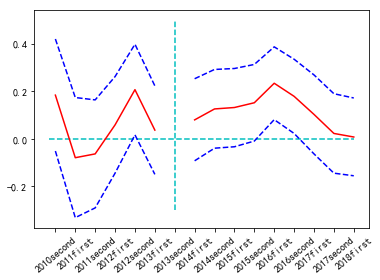

In [116]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#设置x轴柱子的个数
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

import pandas as pd
ad=pd.read_excel(u'C:\\Users\\tcnick\\Desktop\\毕业设计\论文最终稿\\paral_coef.xlsx')

x=np.arange(len(ad.index))
#设置y轴的数值，需将numbers列的数据先转化为数列，再转化为矩阵格式
y=ad.values
xticks1=list(ad[' logcom']) #构造不同课程类目的数列
#画出柱状图

#plt.bar(x,y,align='center',color = 'c',alpha=0.8)
#设置x轴的刻度，将构建的xticks代入，同时由于课程类目文字较多，在一块会比较拥挤和重叠，因此设置字体和对齐方式
plt.xticks(x,xticks1,rotation=40)

plt.plot(ad[' logcom'][:6],ad[' Coef.'][:6],color='r')
plt.vlines('2013second', -0.3, 0.5, colors = "c", linestyles = "dashed")#要放到中间，不然不得行
plt.plot(ad[' logcom'][7:],ad[' Coef.'][7:],color='r')

plt.plot(ad[' logcom'][:6],ad[' 95% Conf'][:6],color='b',linestyle='--')
plt.plot(ad[' logcom'][7:],ad[' 95% Conf'][7:],color='b',linestyle='--')

plt.plot(ad[' logcom'][:6],ad[' Interval'][:6],color='b',linestyle='--')
plt.plot(ad[' logcom'][7:],ad[' Interval'][7:],color='b',linestyle='--')

plt.hlines(0.0, -0.3, 15, colors = "c", linestyles = "dashed")

plt.xlabel("评论时间")
plt.ylabel('交互项系数')


d='C:\\Users\\tcnick\\Desktop\\paral_coef_logcom'
plt.tight_layout()#在保存的时候可以显示完全
plt.savefig("{}.jpg".format(d), dpi=500)#先show


plt.show()
plt.close()

F:\Adaconda3\lib\site-packages\pandas\util\_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


TypeError: 'str' object is not callable

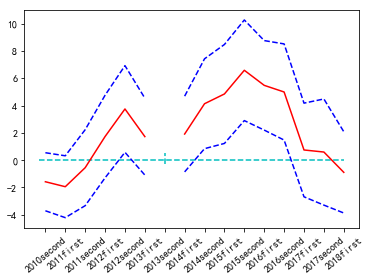

In [115]:
%matplotlib inline
import matplotlib.pyplot as plt
fig= plt.figure()
#设置x轴柱子的个数
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

import pandas as pd
ad=pd.read_excel(u'C:\\Users\\tcnick\\Desktop\\毕业设计\论文最终稿\\paral_coef.xlsx',sheetname='Sheet2')

x=np.arange(len(ad.index))
#设置y轴的数值，需将numbers列的数据先转化为数列，再转化为矩阵格式
y=ad.values
xticks1=list(ad['com']) #构造不同课程类目的数列
#画出柱状图

#plt.bar(x,y,align='center',color = 'c',alpha=0.8)
#设置x轴的刻度，将构建的xticks代入，同时由于课程类目文字较多，在一块会比较拥挤和重叠，因此设置字体和对齐方式
plt.xticks(x,xticks1,rotation=40)

plt.plot(ad['com'][:6],ad[' Coef.'][:6],color='r')
plt.vlines('2013second', -0.3, 0.5, colors = "c", linestyles = "dashed")#要放到中间，不然不得行
plt.plot(ad['com'][7:],ad[' Coef.'][7:],color='r')

plt.plot(ad['com'][:6],ad[' 95% Conf'][:6],color='b',linestyle='--')
plt.plot(ad['com'][7:],ad[' 95% Conf'][7:],color='b',linestyle='--')

plt.plot(ad['com'][:6],ad[' Interval'][:6],color='b',linestyle='--')
plt.plot(ad['com'][7:],ad[' Interval'][7:],color='b',linestyle='--')

plt.hlines(0.0, -0.3, 15, colors = "c", linestyles = "dashed")

plt.xlabel("评论时间")
plt.ylabel('交互项系数')

d='C:\\Users\\tcnick\\Desktop\\paral_coef_com'
plt.tight_layout()#在保存的时候可以显示完全
plt.savefig("{}.jpg".format(d), dpi=500)#先show

plt.show()

In [85]:
help(plt.xlabel)

No Python documentation found for '评论时间'.
Use help() to get the interactive help utility.
Use help(str) for help on the str class.



In [63]:
ad[' logcom'].values[7:]

array(['2014first', '2014second', '2015first', '2015second', '2016first',
       '2016second', '2017first', '2017second', '2018first'], dtype=object)